<a href="https://colab.research.google.com/github/brobro10000/CS5262-foundations-of-machine-learning/blob/main/CS5262_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Drives Income? A Machine Learning Perspective

## Background

The amount an individual makes per year (income) can have an impact on several factors of an individuals well being and the ability to access resources deemed as necessary. Some documented examples of income correlation are found in [healthcare](https://www.ncbi.nlm.nih.gov/books/NBK578537/), [education](https://cepa.stanford.edu/content/widening-academic-achievement-gap-between-rich-and-poor-new-evidence-and-possible-explanations) and [housing](https://repository.gatech.edu/server/api/core/bitstreams/a131f386-4ca6-4be6-a252-0b5b8542f2cb/content). The ability to accurately predict the income level of an individual would potentionally create targeted interventions for those at risk, recognize opportunities for individual growth, and inform policies to address social and economic disparities.

The Census Income is derived from the Census Beureau as "income from several major household surveys and programs" ([source](https://www.census.gov/topics/income-poverty/income.html)). One of the possible challenges to determine an individuals income is being able to accurately retrieve the data in the form of a census and expect all responses are accurate. Another challenge is retrieving a balanced sample of individuals when gathering income levels. This may lead to potentially having a large number of datapoints from a certain income range, and not enough from the the 'tail ends' of society: very low income and very high income.

With this information in mind, I will be using the [*Adult Income Dataset*](https://archive.ics.uci.edu/dataset/2/adult) with machine learning to create a predictive model of whether an individual's income is greater than `$50,000`. This dataset was originally created in 1994 and donated in 1996 and was created by Barry Becker of Silicon Graphics, and [Ronny Kohavi](https://robotics.stanford.edu/~ronnyk/), a consultant and professor at Stanford Robotics Center.


## Project Description

The Adult Income Dataset I will be using derived from [University of California, Irvine, Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult). Below is a table of an overview of the dataset characteristics.

### Overview

| **Dataset Characteristics** | Multivariate        |
|-----------------------------|---------------------|
| **Subject Area**            | Social Science      |
| **Associated Tasks**        | Classification      |
| **Feature Type**            | Categorical, Integer|
| **# Instances**             | 48,842             |
| **# Features**              | 14                 |


### Variables

| **Variable Name** | **Role**   | **Type**       | **Demographic**      | **Description**                                                                                                                                     | **Units** | **Missing Values** |
|-------------------|------------|----------------|-----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|-----------|---------------------|
| age               | Feature    | Integer        | Age                  | N/A                                                                                                                                                 |           | no                 |
| capital-gain      | Feature    | Integer        |                       |                                                                                                                                                     |           | no                 |
| capital-loss      | Feature    | Integer        |                       |                                                                                                                                                     |           | no                 |
| education         | Feature    | Categorical    | Education Level      | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |           | no                 |
| education-num     | Feature    | Integer        | Education Level      |                                                                                                                                                     |           | no                 |
| fnlwgt            | Feature    | Integer        |                       |                                                                                                                                                     |           | no                 |
| hours-per-week    | Feature    | Integer        |                       |                                                                                                                                                     |           | no                 |
| income            | Target     | Binary         | Income               | >50K, <=50K.                                                                                                                                        |           | no                 |
| marital-status    | Feature    | Categorical    | Other                | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                                          |           | no                 |
| native-country    | Feature    | Categorical    | Other                | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, etc.   |           | yes                |
| occupation        | Feature    | Categorical    | Other                | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, etc.                       |           | yes                |
| race              | Feature    | Categorical    | Race                 | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                                                       |           | no                 |
| relationship      | Feature    | Categorical    | Other                | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                                                                |           | no                 |
| sex               | Feature    | Binary         | Sex                  | Female, Male.                                                                                                                                       |           | no                 |
| workclass         | Feature    | Categorical    | Income               | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.                                              |           | yes                |


### Additional Disclosure

The criteria of the dataset was also parsed based on the following parameters

- `((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))`

- `(AAGE>16)` - Age is greater then 16

- `(AGI>100)` - Adjusted growth income is more then '100' units (
  (most likely dollars)

- `(AFNLWGT > 1)` - This represents the final weight. A  description from [Kaggle](https://www.kaggle.com/datasets/uciml/adult-census-income/versions/2/data) is as follows:

  > **Description of `fnlwgt` (final weight)**
  >
  > The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
  >
  > - A single cell estimate of the population 16+ for each state.
  > - Controls for Hispanic Origin by age and sex.
  > - Controls by Race, age, and sex.
  >
  > We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights.
  >
  > There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

- `(HRSWK>0)` - Hours worked is greater then 0.


### Methodology

The process I intend to use to complete this project is listed below.

- Create a problem definition
- Perform exploratory data analysis
- Iteratively perform the following steps:
  - Feature engineering
  - Modeling
  - Assessment
- Summarize findings and model feasability

#### Problem Definition

Census data pertaining to adult income were retrieved and archived within the UC Irvine Machine Learning Repository. With this data and machine learning, can I create a model that predicts if an individual makes more than `$50,000` a year? The model should accurately and precisely predict whether an individual's income is greater than `$50,000`.

The datasource provides baseline model performance values for each metric, and the objective is to improve predictive value by at least 5% above the baseline for each metric. This model could help governments and organizations determine which individuals are most at risk of falling below this value, and what fields correlate to a higher income.

#### Data Source

The data source, UC Irvine, has many possibilities for using the data. There is an option to use the API to retrieve the raw dataset, along with individual test and train data or we can directly save them within Google Colab which will act as our development environment, and slightly improve performance by importing it locally.

Given we have a set of test and train data provided seperately, I plan to use the provided test data as final holdout data to perform the final model evaluation, along with creating a test/train split with a 75% training set, and 25% test set.

Since the dataset is considered an imbalanced dataset, research will have to be done on how to appropriately handle test/train data splitting to make sure a valid subset of the data is within each set.

#### Exploratory Data Analysis

Using synonymous Python packages, we will begin parsing through the data, and highlight correlations that may exist between individudal fields and income, while highlighting uniqueness between features and their correlation to avoid redundant features while maintaining the mantra that "Correlation does not equal causation" ([source](https://www.machinelearningplus.com/statistics/correlation/#ImportanceofCorrelationinDataScience)).

Packages to be used:

- Pandas
- NumPy
- Scikit-learn
- Matplotlib/Seaborn

Pandas and Numpy will be used to help manipulate the raw data into more usable data structure. Matplotlib and its extended version, Seaborn, will be used to assist in the exploratory data analysis portion, while Scikit-learn will help us break the dataset into our test/train split. Since we also have holdout test data, I will not be performing any exploratory data analysis on that subset of data.

#### Feature Engineering

As part of exploratory data analysis, it is important to process the data further before feeding it into a model. Here are the following ways I anticipate feature engineering for the income dataset

- Removing or 'Averaging' empty data points
- Encoding of categorical data (such as education level)
- Data aggregation of common fields (such as education level)
- Handling outliers beyond what is provided by `fnlwgt`

Once sufficient data analysis has been done, we will leverage the outcome of feature engineering to make our final selection for fields to feed into our training model

Given feature engineering is an iterative process, I anticipate revisiting feature engineering to create and consolidate for the most performant model based on our performance metric.

#### Modeling
Leveraging the compute and GPU resources of Google Colab, we will select a model to train our data against after each iteration of feature engineering.

Since the outcome of our model is intended to be a binary choice and the dataset presents itself as a classification based dataset for machine learning, I will be choosing several different classification models agaisnt each iteration of feature engineering. The main models types I will consider are identical to what is provided in the baseline model performance, and determine if the features selected outperform the the provided outcomes for precision and accuracy. The models provided are as follows ([source](https://archive.ics.uci.edu/dataset/2/adult)):

- Xgboost
- Support Vector
- Random Forest
- Neural Network
- Logistic

Since the most performant model types provided for both accuracy and precision are Xgboost, Support Vector and Random forest, those are the model types I will be focusing on specfically.

#### Assessment

Assessment will be done by using the trained model against the original train/test split from the training data. If the results of test data meets the requirements set by the Problem Definition, (greater then 5% increase in accuracy and precision against each base model's performance), we will then assess the model against the holdout test data provided by the data source. If the outcome of the model still exceeds our defined performance objectives, further performance metrics will be gauged and the model will be serialized to revisit and iterate further if necessary.

#### Summary

Once performant (and non-performant) models are recognized, we will summarize our findings and highlight our initial project definition performance metrics, and any additional metrics that result from analysis of the holdout data against each model.

## Performance Metrics

Given the datasource has provided us with a stepping stone into which metrics we can utilize, we will leverage those first (precision and accuracy).

Additional metrics that can be used is determing the cost benefit analysis of our results against a confusion matrix. Finally, since this is considered an imbalanced dataset, some brief research ([source](https://futuremachinelearning.org/strategies-to-handle-imbalanced-datasets-in-machine-learning/)) there are several strategies to determine the most relevant metrics to use.

Relevant Formulas:


| **Metric**      | **Formula**                                | **Description**                                                                                  |
|------------------|--------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Precision**    | TP / (TP + FP)                            | Measures accuracy of positive predictions; inversely related to false positive rate (FPR).       |
| **Recall (TPR)** | TP / (TP + FN)                            | Measures the proportion of actual positive cases correctly identified (also called Sensitivity). |
| **FPR**          | FP / (FP + TN)                            | Measures the proportion of actual negative cases incorrectly classified as positive.            |
| **ROC-AUC**      | Integral of TPR against FPR               | Quantifies the trade-off between TPR and FPR; reflects a model's capacity to distinguish classes.|


Where TP is true postive, FP is false positive, TPR is true postive rate and FPR is false positive rate. ([source](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification))

Since the goal is to improve on the baseline model by 5% for accuracy and precision, we expect the same level of increase against the holdout test data.


---
# What questions do I have based on the dataset?

Below are a series of assumptions I have based on just observing the features provided to us in the dataset. Answering these questions could give us some good insight into what features we can use when creating our first model.

1. Do married individuals make over `$50,000` per year then non-married individuals?
2. Does a 4 year college degree or higher increase the changes of making over `$50,000` per year?
3. Do greater percentage of males make over `$50,000` per year than females?
4. Does working greater then 40 hours per week result in a greater likelihood of making over `$50,000` per year?
5. What is the order from least amount of individuals making above `$50,000` to greatest amount of individuals above `$50,000` proportionally to the overall `workclass`

Below we will begin our exploratory data analysis (EDA) to attempt to answer these questions.


---

In [545]:
# Install xgboost
!apt install xgboost
!pip install xgboost

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xgboost is already the newest version (1.5.2-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [546]:

# common libraries
import os
import joblib
import urllib.request
import time

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML and Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    f1_score,
    average_precision_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    roc_curve,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import (
    OrdinalEncoder,
    StandardScaler,
    OneHotEncoder,
    FunctionTransformer,
)
from sklearn.svm import LinearSVC
from sklearn import config_context, set_config

In [547]:
# Base directories
base_path = '/content/gdrive/My Drive/Colab Notebooks'
dataset_dir = os.path.join(base_path, 'income_dataset')
save_dir = 'model_result'

# API Source URLs
files = {
    'adult.data': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
    'adult.test': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
    'adult.names': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names',
    'Index': 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/Index'
}

# Ensure directory exists
if os.path.exists(base_path):
  if not os.path.exists(dataset_dir):
      os.makedirs(dataset_dir)
      print(f"✅ Directory created: {dataset_dir}")
  else:
      print(f"✅ Directory already exists: {dataset_dir}")

# Dictionary to store file locations (local or API)
file_locations = {}

# Download files or set API reference
for file_name, url in files.items():
    file_path = os.path.join(dataset_dir, file_name)

    if os.path.exists(file_path):
        print(f"✅ {file_name} exists locally at {file_path}")
        file_locations[file_name] = file_path
    else:
        print(f"🌐 {file_name} not found locally. Using API source: {url}")
        file_locations[file_name] = url

# Assign variables dynamically based on source
index = file_locations['Index']
income_names = file_locations['adult.names']
income_dataset = file_locations['adult.data']
income_dataset_test = file_locations['adult.test']

df = pd.read_csv(income_dataset, header=None, skipinitialspace=True)
df_holdout = pd.read_csv(income_dataset_test, header=None, skip_blank_lines=True, skiprows=1)
# This describe was complete to get a count of total values when answering our test/train split
df_holdout.describe()

✅ Directory already exists: /content/gdrive/My Drive/Colab Notebooks/income_dataset
🌐 adult.data not found locally. Using API source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
🌐 adult.test not found locally. Using API source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
🌐 adult.names not found locally. Using API source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
🌐 Index not found locally. Using API source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/Index


,0,2,4,10,11,12
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [548]:
# Peeking into our data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [549]:
# Make headers a bit easier to parse through
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [550]:
# Data insights
df.info()
# general info
df.describe()
# count of each value (this will reveal how skewed our data appears)
df['income'].value_counts()
# unique values per column
df.nunique()
# describe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


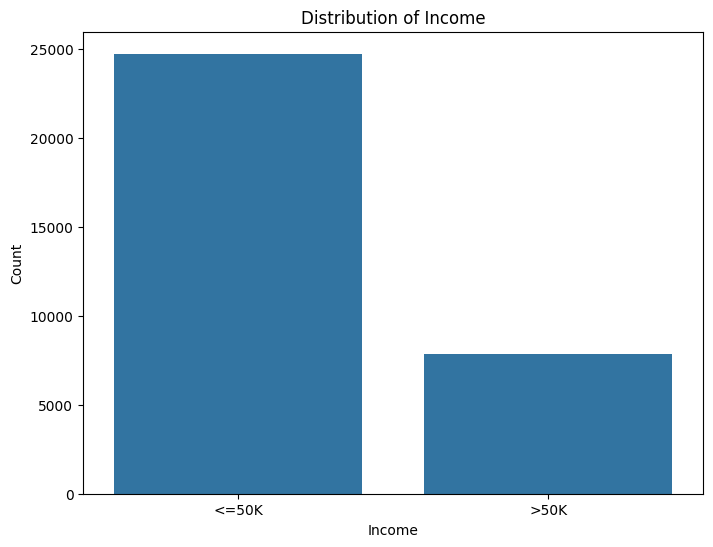

In [551]:
# based on our initial findings, we can see there are far more individuals who make less then 50k a year.
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [552]:
# Attempt to answer our first question. Do married individuals make more then non-married individuals?
df.groupby('marital-status')['income'].value_counts(normalize=True)


marital-status         income
Divorced               <=50K     0.895791
                       >50K      0.104209
Married-AF-spouse      <=50K     0.565217
                       >50K      0.434783
Married-civ-spouse     <=50K     0.553152
                       >50K      0.446848
Married-spouse-absent  <=50K     0.918660
                       >50K      0.081340
Never-married          <=50K     0.954039
                       >50K      0.045961
Separated              <=50K     0.935610
                       >50K      0.064390
Widowed                <=50K     0.914401
                       >50K      0.085599
Name: proportion, dtype: float64

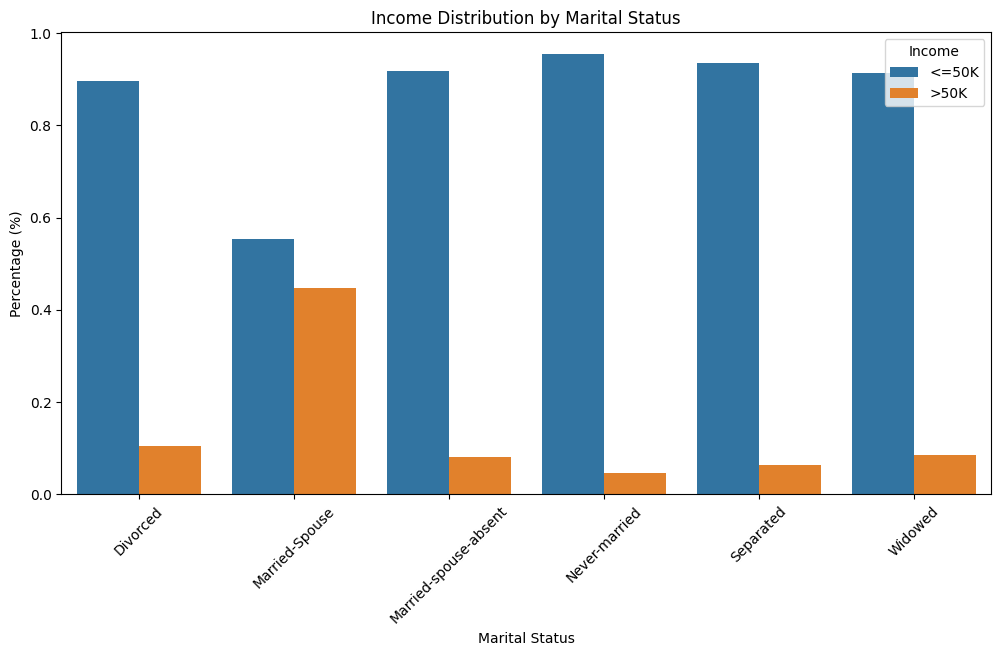

In [553]:
# Based on our output, civ-spouse (civilian spouse) and af-spouse (armed-force spoud),
# had the largest ratio of individuals making over 50k per year.
# Lets combine it for simplicity and generate a plot
df['marital-status'] = df['marital-status'].apply(lambda x: 'Married-Spouse' if x in ['Married-civ-spouse', 'Married-AF-spouse'] else x)
income_proportion = df.groupby('marital-status')['income'].value_counts(normalize=True)
# We must convert it to a dataframe and define columns
income_proportion_df = pd.DataFrame(income_proportion).reset_index()
income_proportion_df.columns = ['marital-status', 'income', 'percentage']

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='marital-status', y='percentage', hue='income', data=income_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Marital Status")
plt.title("Income Distribution by Marital Status")
plt.legend(title="Income", loc="upper right")
plt.show()

In [554]:
# Next question to answer: Does a 4 year college degree or higher increase the chances that you make over 50k per year?
# Taking a look at the raw data before grouping
df.groupby('education')['income'].value_counts(normalize=True)


education     income
10th          <=50K     0.933548
              >50K      0.066452
11th          <=50K     0.948936
              >50K      0.051064
12th          <=50K     0.923788
              >50K      0.076212
1st-4th       <=50K     0.964286
              >50K      0.035714
5th-6th       <=50K     0.951952
              >50K      0.048048
7th-8th       <=50K     0.938080
              >50K      0.061920
9th           <=50K     0.947471
              >50K      0.052529
Assoc-acdm    <=50K     0.751640
              >50K      0.248360
Assoc-voc     <=50K     0.738784
              >50K      0.261216
Bachelors     <=50K     0.585247
              >50K      0.414753
Doctorate     >50K      0.740920
              <=50K     0.259080
HS-grad       <=50K     0.840491
              >50K      0.159509
Masters       >50K      0.556587
              <=50K     0.443413
Preschool     <=50K     1.000000
Prof-school   >50K      0.734375
              <=50K     0.265625
Some-college  <=50K     0.809765
              >50K      0.190235
Name: proportion, dtype: float64

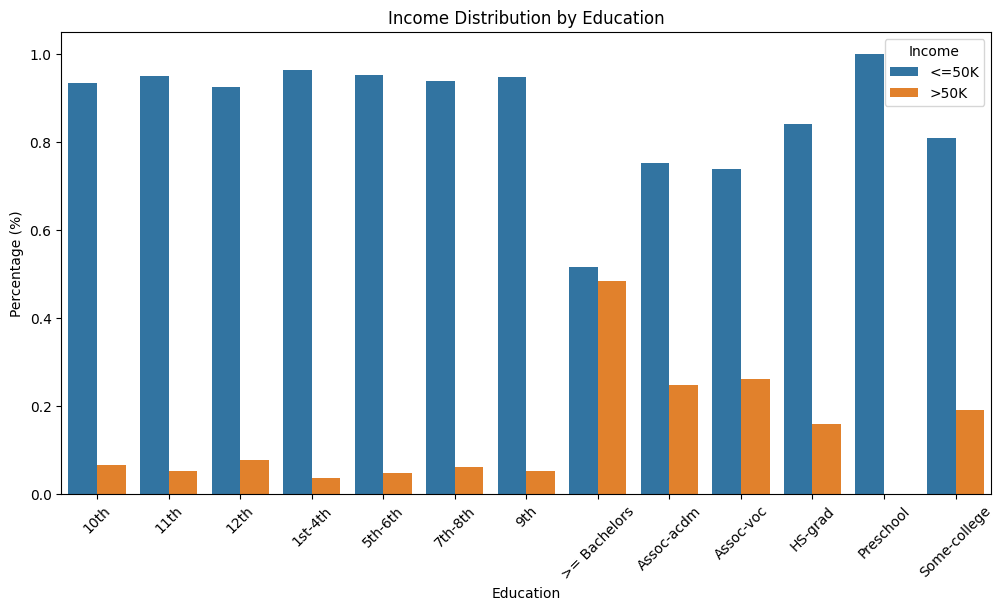

In [555]:
# Group everything considered equal to or above a bachelors degree.
# We are grouping: Bachelors, Masters, Prof-school, Doctorate
df['education'] = df['education'].apply(lambda x: '>= Bachelors' if x in ['Bachelors', 'Masters', 'Prof-school', 'Doctorate'] else x)

# Plot output
income_proportion = df.groupby('education')['income'].value_counts(normalize=True)
# We must convert it to a dataframe and define columns
income_proportion_df = pd.DataFrame(income_proportion).reset_index()
income_proportion_df.columns = ['education', 'income', 'percentage']

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='education', y='percentage', hue='income', data=income_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Education")
plt.title("Income Distribution by Education")
plt.legend(title="Income", loc="upper right")
plt.show()

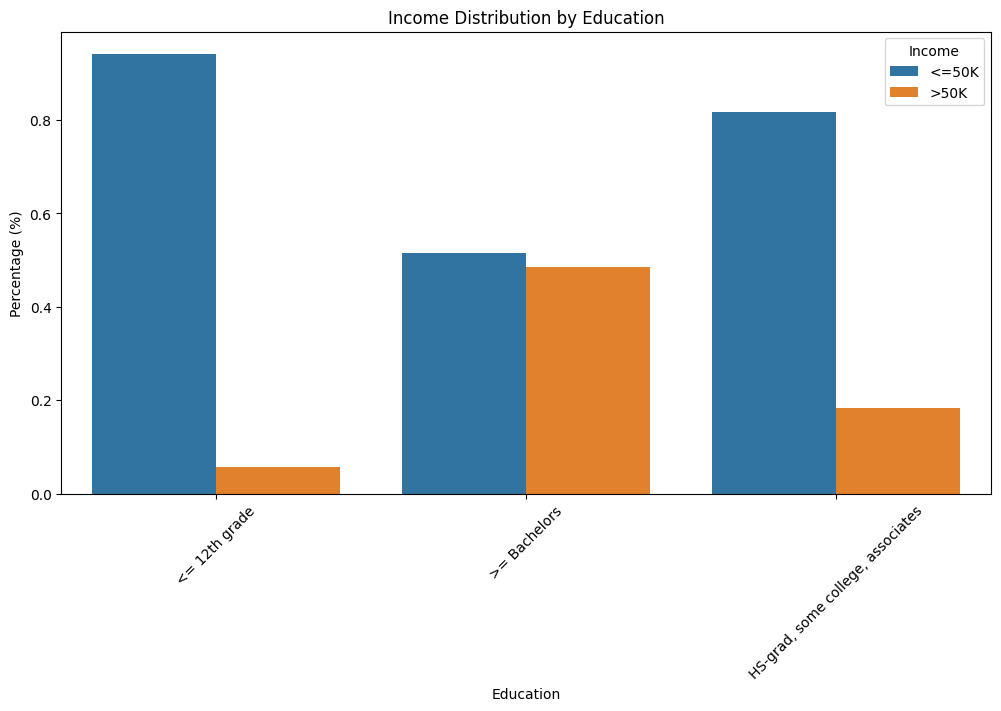

In [556]:
# Finally lets make the plot really easy to read by only
# having 3 groups: >= bachelors, <= bachelors && HS-grad, and <= 12th grade education
df['education'] = df['education'].apply(lambda x: '>= Bachelors' if x in ['Bachelors', 'Masters', 'Prof-school', 'Doctorate'] else x)
df['education'] = df['education'].apply(lambda x: 'HS-grad, some college, associates' if x in ['HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc'] else x)
df['education'] = df['education'].apply(lambda x: '<= 12th grade' if x in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Preschool'] else x)

# Plot output
income_proportion = df.groupby('education')['income'].value_counts(normalize=True)
# We must convert it to a dataframe and define columns
income_proportion_df = pd.DataFrame(income_proportion).reset_index()
income_proportion_df.columns = ['education', 'income', 'percentage']

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='education', y='percentage', hue='income', data=income_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Education")
plt.title("Income Distribution by Education")
plt.legend(title="Income", loc="upper right")
plt.show()

In [557]:
# Next question: Do a greater percentage of males make over 50k then females?
df.groupby('sex')['income'].value_counts(normalize=True)

sex     income
Female  <=50K     0.890539
        >50K      0.109461
Male    <=50K     0.694263
        >50K      0.305737
Name: proportion, dtype: float64

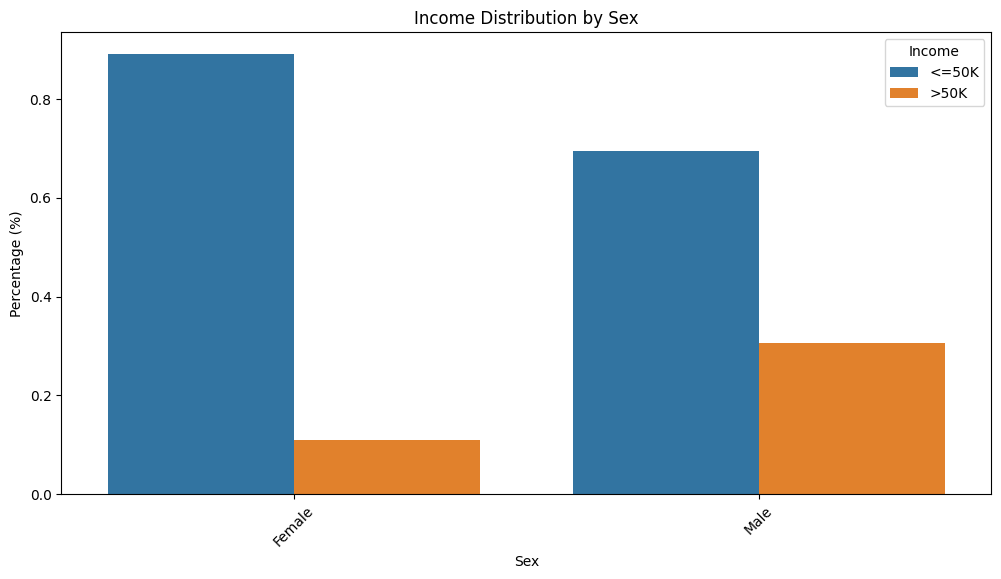

In [558]:
# Unfortunately, it appears so. Lets visualize it!
# Plot output
income_proportion = df.groupby('sex')['income'].value_counts(normalize=True)
# We must convert it to a dataframe and define columns
income_proportion_df = pd.DataFrame(income_proportion).reset_index()
income_proportion_df.columns = ['sex', 'income', 'percentage']

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='percentage', hue='income', data=income_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Sex")
plt.title("Income Distribution by Sex")
plt.legend(title="Income", loc="upper right")
plt.show()

In [559]:
# Next question: Does working greater then 40 hours per year
# result in a great likelihood of making over 50k per year?
df.groupby('hours-per-week')['income'].value_counts(normalize=True)

# Looks like theres way too much data to render! lets try some groupings

hours-per-week  income
1               <=50K     0.900000
                >50K      0.100000
2               <=50K     0.750000
                >50K      0.250000
3               <=50K     0.974359
                            ...   
97              >50K      0.500000
98              <=50K     0.727273
                >50K      0.272727
99              <=50K     0.705882
                >50K      0.294118
Name: proportion, Length: 173, dtype: float64

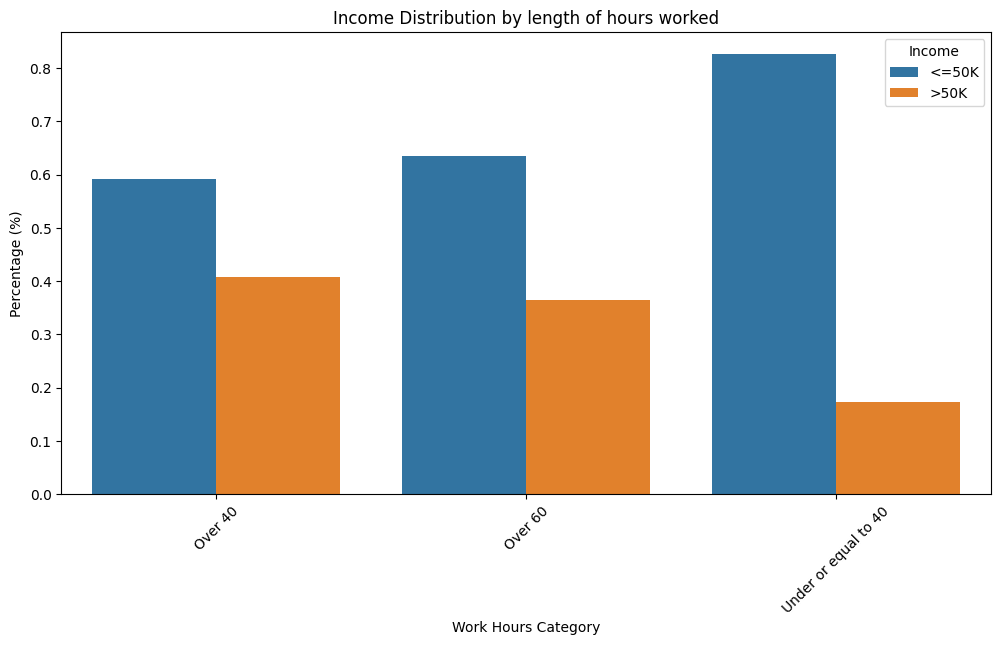

In [560]:
# First lets do a couple of charts, we will group by those making over 40, over 60 and less then and equal to 40 and plot them
# Since the hours per week is a string and we need to compare numbers, lets make the column a number
# We will make a new column to avoid parsing str and float errors doing in column comparison
df['hours-per-week'] = pd.to_numeric(df['hours-per-week'], errors='coerce')

df['work_hours_category'] = df['hours-per-week'].apply(lambda x: (
    'Over 60' if x > 60 else
    'Over 40' if x > 40 and x <= 60 else
    'Under or equal to 40'
))

# Plot Output
income_proportion = df.groupby('work_hours_category')['income'].value_counts(normalize=True)

# We must convert it to a dataframe and define columns
income_proportion_df = pd.DataFrame(income_proportion).reset_index()
income_proportion_df.columns = ['work_hours_category', 'income', 'percentage']

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='work_hours_category', y='percentage', hue='income', data=income_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Work Hours Category")
plt.title("Income Distribution by length of hours worked")
plt.legend(title="Income", loc="upper right")
plt.show()

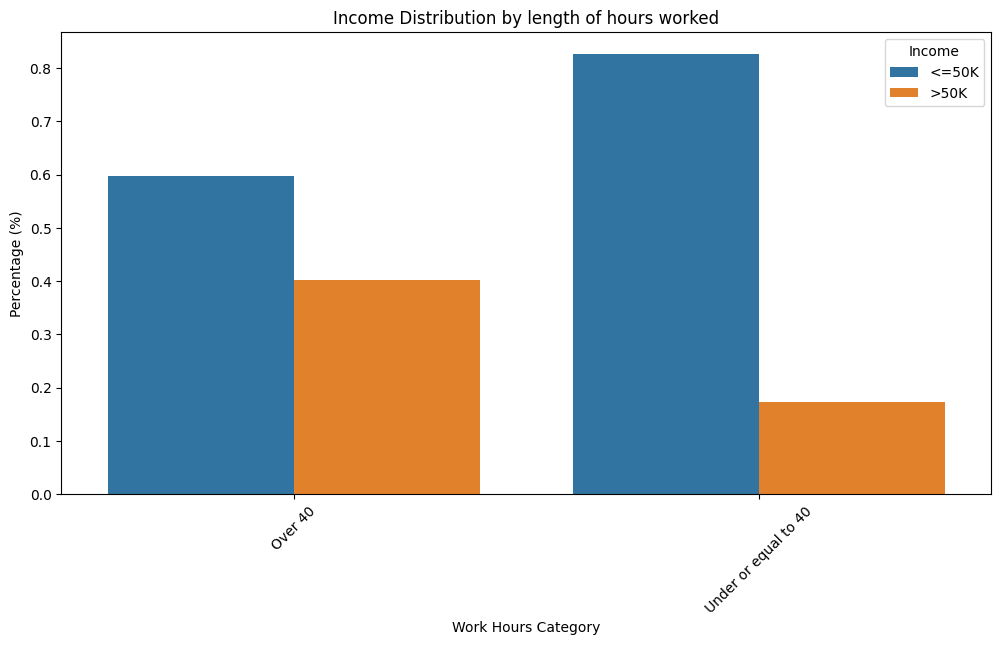

In [561]:
# We can combine one more time since there is little difference between over 40 and over 60
df['work_hours_category'] = df['work_hours_category'].apply(lambda x: 'Over 40' if x in ['Over 40', 'Over 60'] else x)

# Plot Output
income_proportion = df.groupby('work_hours_category')['income'].value_counts(normalize=True)

# We must convert it to a dataframe and define columns
income_proportion_df = pd.DataFrame(income_proportion).reset_index()
income_proportion_df.columns = ['work_hours_category', 'income', 'percentage']

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='work_hours_category', y='percentage', hue='income', data=income_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Work Hours Category")
plt.title("Income Distribution by length of hours worked")
plt.legend(title="Income", loc="upper right")
plt.show()


In [562]:
# Final question: What is the order from least amount of individuals making
# above 50000 to greatest amount of individuals above 50000 proportionally to the overall `workclass`
# Clean up unknown class (?)
df['workclass'] = df['workclass'].apply(lambda x: 'Unknown' if x == '?' else x)
df.groupby('workclass')['income'].value_counts(normalize=True)

workclass         income
Federal-gov       <=50K     0.613542
                  >50K      0.386458
Local-gov         <=50K     0.705208
                  >50K      0.294792
Never-worked      <=50K     1.000000
Private           <=50K     0.781327
                  >50K      0.218673
Self-emp-inc      >50K      0.557348
                  <=50K     0.442652
Self-emp-not-inc  <=50K     0.715073
                  >50K      0.284927
State-gov         <=50K     0.728043
                  >50K      0.271957
Unknown           <=50K     0.895969
                  >50K      0.104031
Without-pay       <=50K     1.000000
Name: proportion, dtype: float64

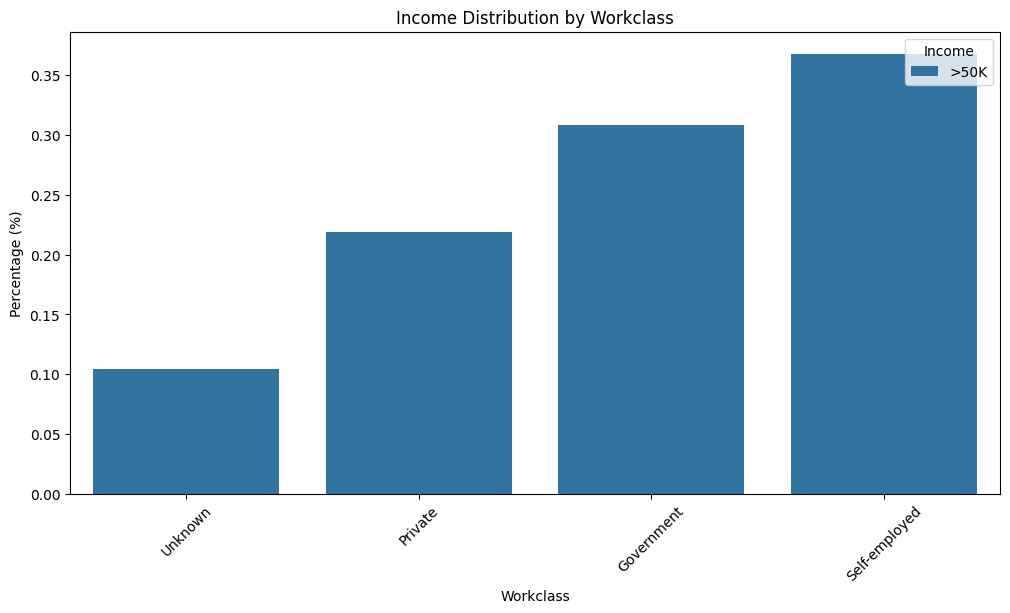

In [563]:
# Plot the order of workclass from least to greatest based on if they make greater then 50k
# We also combine the self-employed-inc and self-employed-not-inc, and combine all government type jobs
df['workclass'] = df['workclass'].apply(lambda x: 'Self-employed' if x in ['Self-emp-inc', 'Self-emp-not-inc'] else x)
df['workclass'] = df['workclass'].apply(lambda x: 'Government' if x in ['Federal-gov', 'State-gov', 'Local-gov'] else x)
workclass_proportion = df.groupby('workclass')['income'].value_counts(normalize=True).sort_values(ascending=True)

# Now we isolate only those greater then 50k
workclass_proportion_df = pd.DataFrame(workclass_proportion).reset_index()
workclass_proportion_df = workclass_proportion_df[workclass_proportion_df['income'] == '>50K']
workclass_proportion_df.columns = ['workclass', 'income', 'percentage']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='workclass', y='percentage', hue='income', data=workclass_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Workclass")
plt.title("Income Distribution by Workclass")
plt.legend(title="Income", loc="upper right")
plt.show()

---

## EDA Findings

Based on the initial questions asked, we were able to determine the following based on our exploratory data analysis:


*   Married individuals have a greater likelihood of having an income greater then `$50,000` then their peers
*  Individuals who have a bachelors degree or higher have a greater likelihood of having in come greater then `$50,000` then their peers
*  Men did a higher proportion of individuals who earn more then `$50,000` then women.
*  Those who worked over 40 hours per week had a greater proportion of individuals who earned more then `$50,000` then those who worked less than or equal to 40 hours per week.
* Individuals who were employed by the government or self employed tended to have an income greater then `$50,000` then those in other work classes.

This insightful information is good start into isolate some key features to pipe into our machine learning model.





## Feature Engineering

The type of feature engineering we will perform will focus on a couple key areas that should provide us with impactful outcomes with a focus on simplification. Listed below are some key areas I will be focusing on related to this dataset.



*   Ordinal and Label Encoding
  * Ordinal encoding can be leveraged for education levels. we can use our consolidated `education` column to simplify how we attempt to classify individuals when determining income levels.
  * Label encoding could be leveraged for other columns such the `sex`, `workclass`, and `hours-per-week`.
*   Remove redundant fields
  * Fields such as `education-num` and `relationship` can be removed because we have other fields that we can reference that tell us the same information. `education-num` for example although useful, is not the most intuitive in terms of EDA due to the extra step required to determining what each number means. `relationship` can be removed because the `marital-status` gives us the same information without the unnecessary data of `Wife` vs `Husband` etc.
* Creating new features or combining features (binning)
  * There are plenty of features we can combine fields in to simplify our classification such as `education`, `marital-status`, `workclass`, and `hours-per-week`. `age`, and `capital-gain`/`capital-loss` are other fields we did not explore in depths but there is definitely potential in combining ranges of age, and combining `capital-gain`/`capital-loss` into a single column. Some of field combination was already done and will be carried over when we eventually construct our pipeline.

## Train/Test Split

For our train test split, I intend to split the training data into a 75/25 split respectively. This allows a good portion of data to train on to prepare for our holdout data. The holdout data which has about \~16k rows, would be less then the training data rows (\~24k rows) but more then our training data split (\~8.1k)

One important thing to note is the type of split we have to perform. Because our data has been historically classified as imbalance as well as demonstrated by the count between individuals `>$50,000` vs `<=$50,000`, we must perform a stratified split. A stratified split allows for each dataset to contain this same imbalanced proportion of `income`.

## Initial Pipeline

For our pipeline, we will use a few of the transformers to acheive our goals.

* FunctionTransformer
  * This will mainly be used for feature engineering when defining explicity categories for certain fields
* SimpleImputer
  * Will be used to fill missing data based on a strategy provided such as `median` or `most_frequent`.
* OrdinalEncoder and LabelEncoder
  * The ordinal encoder would be used to define a progressive order to the `education` field using hte binning technique we've defined above.
  * The LabelEncoder would be use for other categorical data not dependent on a hierarchy to codify them as numerical values.
* StandardScaler
  * Used on numerical data to introduce stability in the model. Fields such as `age` (if we don't create categories) and a combined `capital-gains` column would benefit from this transformer
* drop
  * Drop allows us to remove redundant fields. We have already determined for our purpose, the `education-num` and `relationship` field can be dropped.  

These transformers would constitute our pre-processing pipeline.

## Model Fitting and Evaluation

Assumptions about the features highlighted, feature importance:

* At a certain level, `education` levels are a strong predictor of earning greater than `$50,000` a year.
* Work stability and factors surrounding it such as type of employment (`workclass`) and length of hours worked per day (`hours-per-week`) indicate a stable job with the potential of job growth
* Stable home life indicated by `marital-status` reduces the chance of job instability, giving the potential to receive more education and focus on job growth.

Based on these factors I have highlighted, I predict my model will outperform the baseline performance  presented from the data source, [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult), and it will out perform both on accuracy and precision on the top models I have selected to run: XgBoost, Support Vector, and RandomForest.


---

## EDA Continuation

Our goal is to identify more relationships between our features and the predictability of income.

In [564]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'work_hours_category'],
      dtype='object')

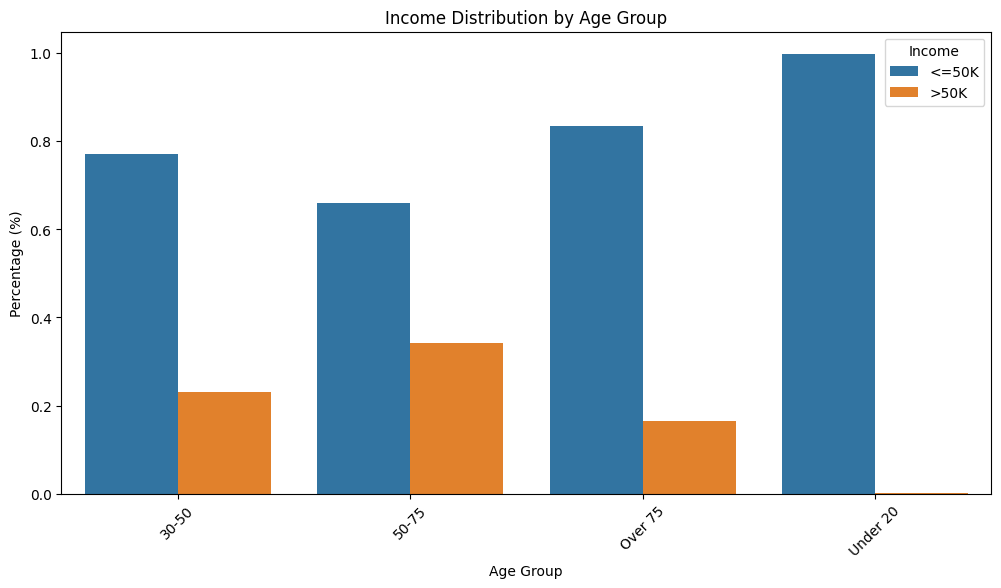

In [565]:
# Group age
df["age_group"] = df["age"].apply(
    lambda x: "Under 20" if x < 20 else
              "30-50" if x < 50 else
              "50-75" if x < 75 else
              "Over 75"
            )

age_proportion = df.groupby('age_group')['income'].value_counts(normalize=True)
age_proportion_df = pd.DataFrame(age_proportion).reset_index()
age_proportion_df = age_proportion_df.sort_values(by='age_group')
age_proportion_df.columns = ['age_group', 'income', 'percentage']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='age_group', y='percentage', hue='income', data=age_proportion_df)
plt.xticks(rotation=45)
plt.ylabel("Percentage (%)")
plt.xlabel("Age Group")
plt.title("Income Distribution by Age Group")
plt.legend(title="Income", loc="upper right")
plt.show()

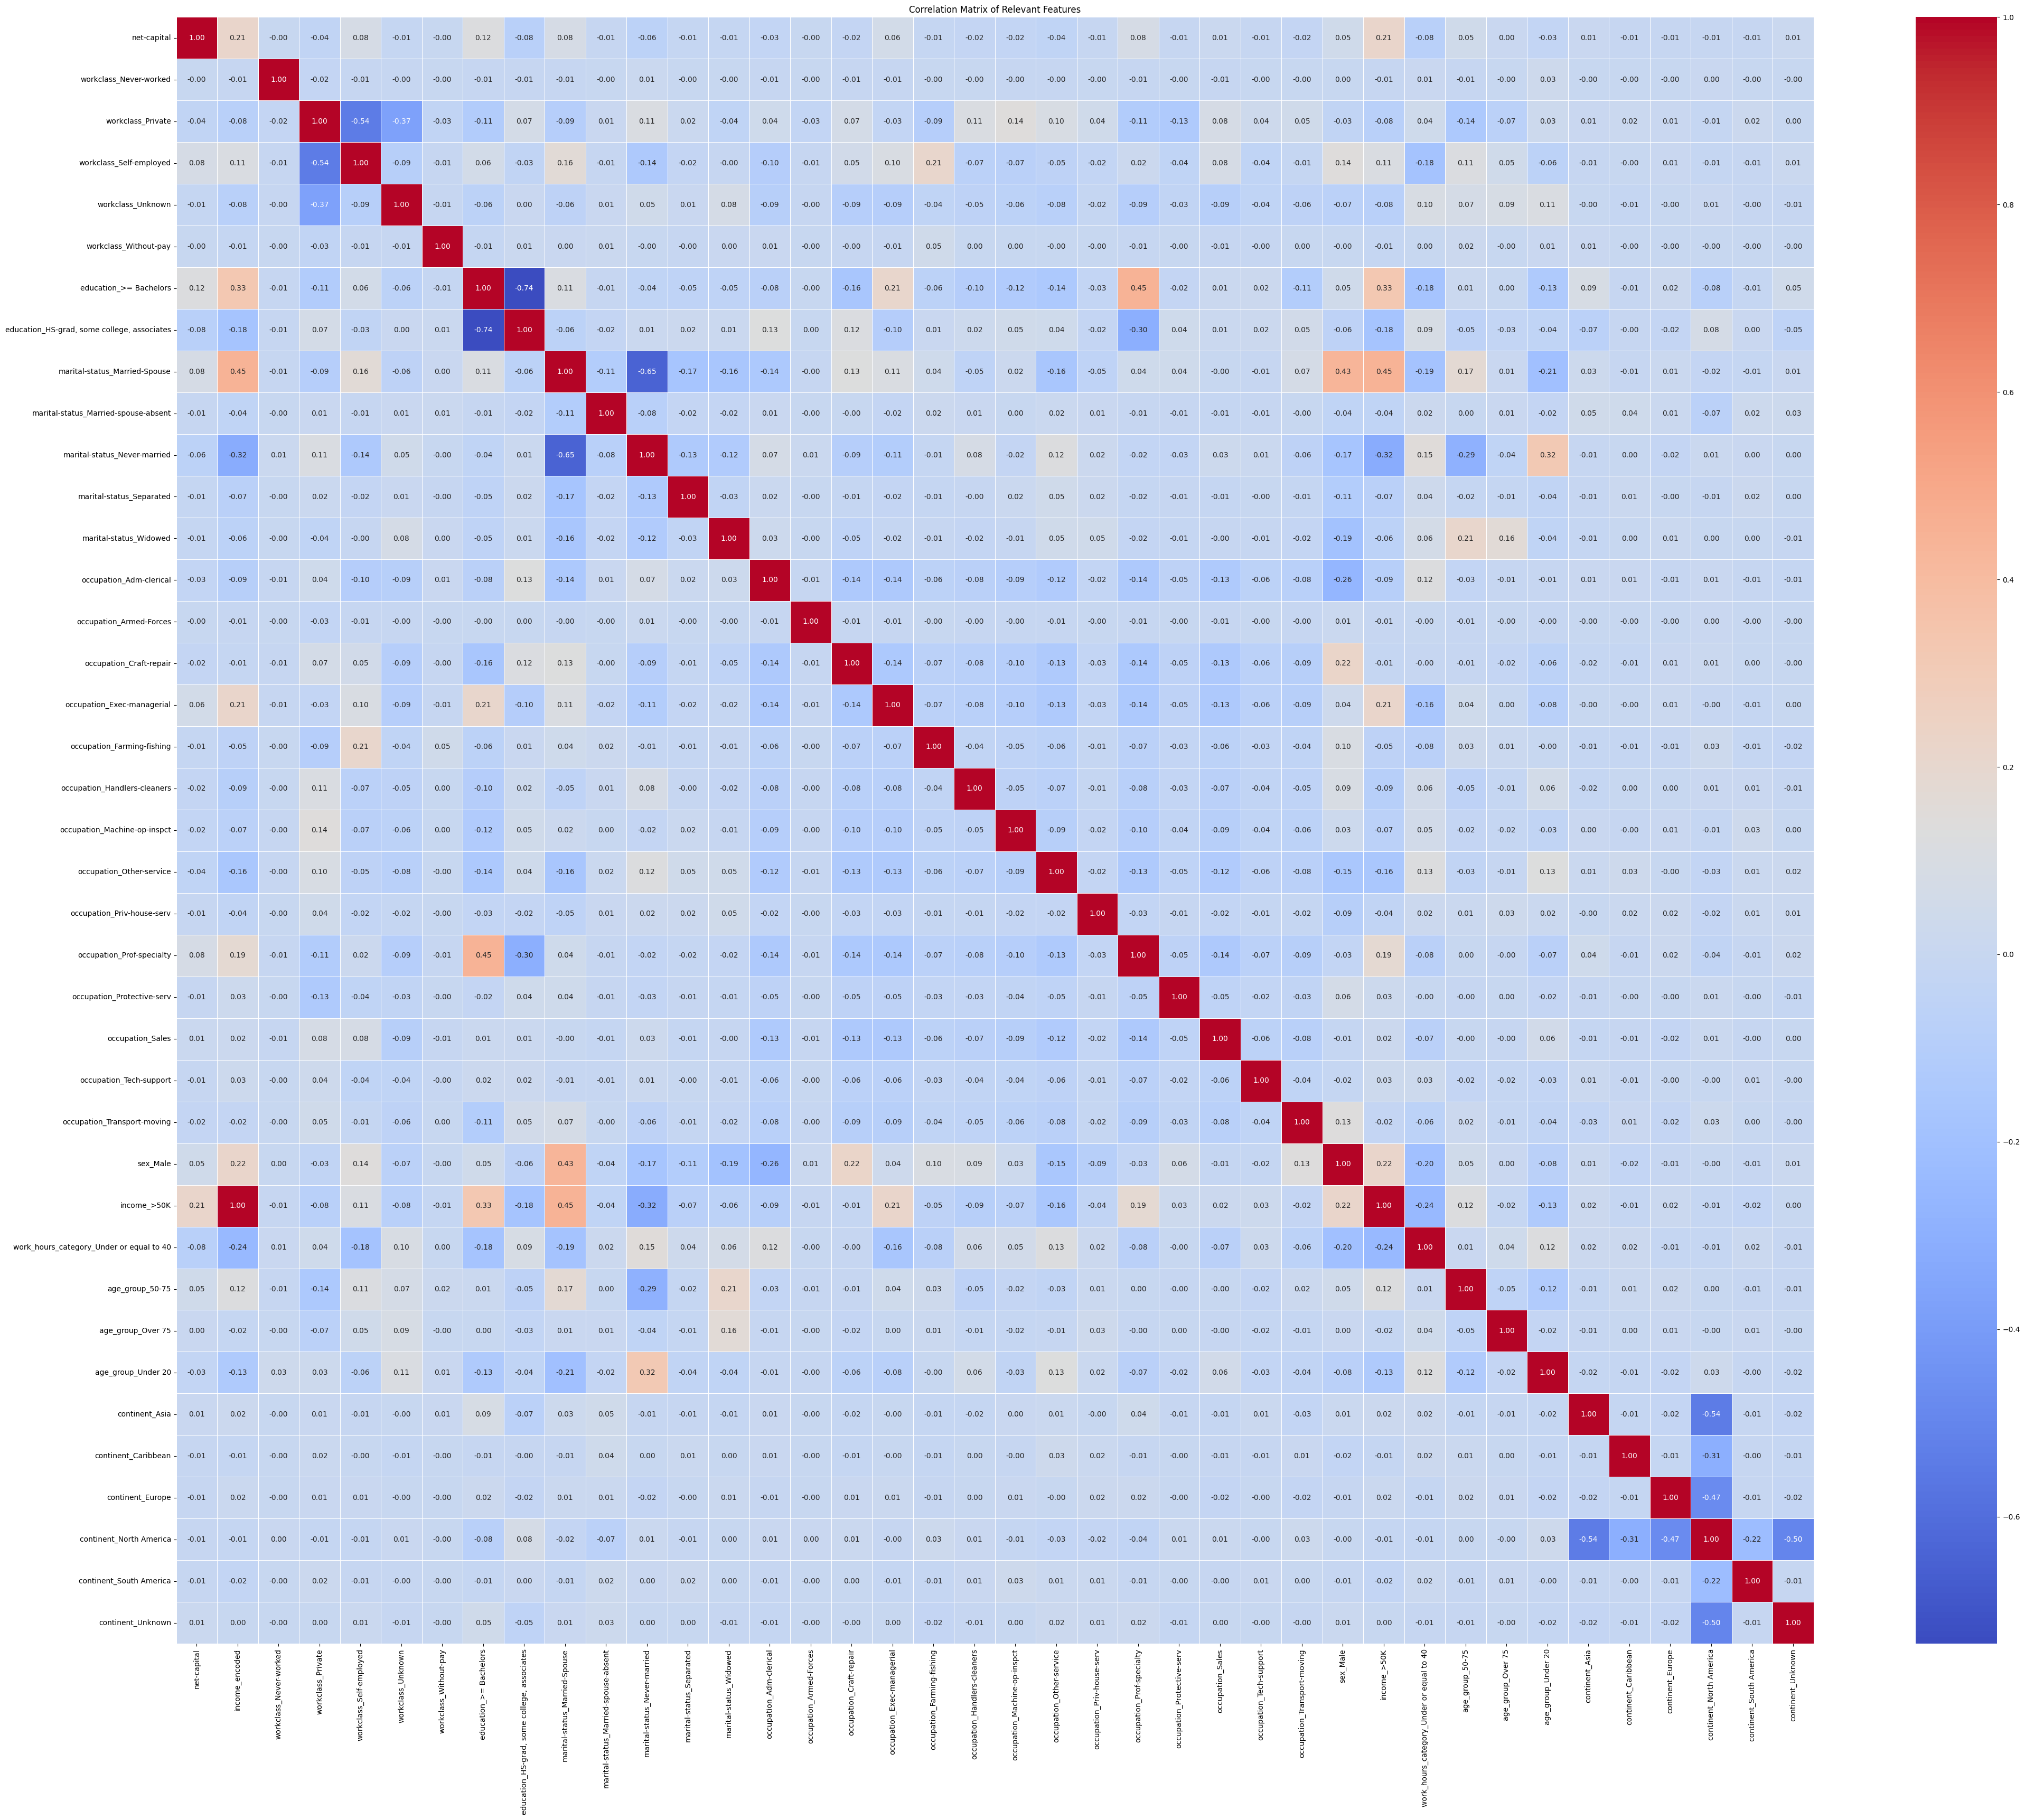

In [566]:
# lets transform the last few fields and run a correlation map
# first lets finish combining some data
# we will create a net-capital field, and a continent origin field
# Encode income as numeric (0 for <=50K, 1 for >50K)
df['net-capital'] = df['capital-gain'] - df['capital-loss']

# Define mapping of countries to continents
country_to_continent = {
    "United-States": "North America",
    "Canada": "North America",
    "Mexico": "North America",
    "Puerto-Rico": "North America",
    "Honduras": "North America",
    "Dominican-Republic": "North America",
    "El-Salvador": "North America",
    "Guatemala": "North America",
    "Nicaragua": "North America",
    "Trinadad&Tobago": "North America",
    "Outlying-US(Guam-USVI-etc)": "North America",
    "Columbia": "South America",
    "Ecuador": "South America",
    "Peru": "South America",
    "England": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    "Portugal": "Europe",
    "France": "Europe",
    "Scotland": "Europe",
    "Greece": "Europe",
    "Hungary": "Europe",
    "Ireland": "Europe",
    "Yugoslavia": "Europe",
    "Holand-Netherlands":
    "Europe",
    "India": "Asia",
    "Iran": "Asia",
    "Philippines": "Asia",
    "Cambodia": "Asia",
    "Thailand": "Asia",
    "Laos": "Asia",
    "Taiwan": "Asia",
    "China": "Asia",
    "Japan": "Asia",
    "Vietnam": "Asia",
    "Hong": "Asia",
    "South":
    "Africa",
    "Cuba": "Caribbean",
    "Jamaica": "Caribbean",
    "Haiti": "Caribbean",
    "?": "Unknown"
}

# Apply function to map native-country to continent
df["continent"] = df["native-country"].apply(lambda x: country_to_continent.get(x, "Unknown"))

df["income_encoded"] = df["income"].map({"<=50K": 0, ">50K": 1})

# Drop seemingly unimportant columns for readability
columns_to_drop = ['capital-gain', 'capital-loss', 'education-num', 'relationship', 'native-country', 'age', 'fnlwgt', 'hours-per-week', 'race']
df = df.drop(columns=columns_to_drop)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical columns

plt.figure(figsize=(50, 40))
sns.heatmap(df_encoded.corr().drop(index="income_encoded") , annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Formatting
plt.title('Correlation Matrix of Relevant Features')
plt.show()


<Axes: >

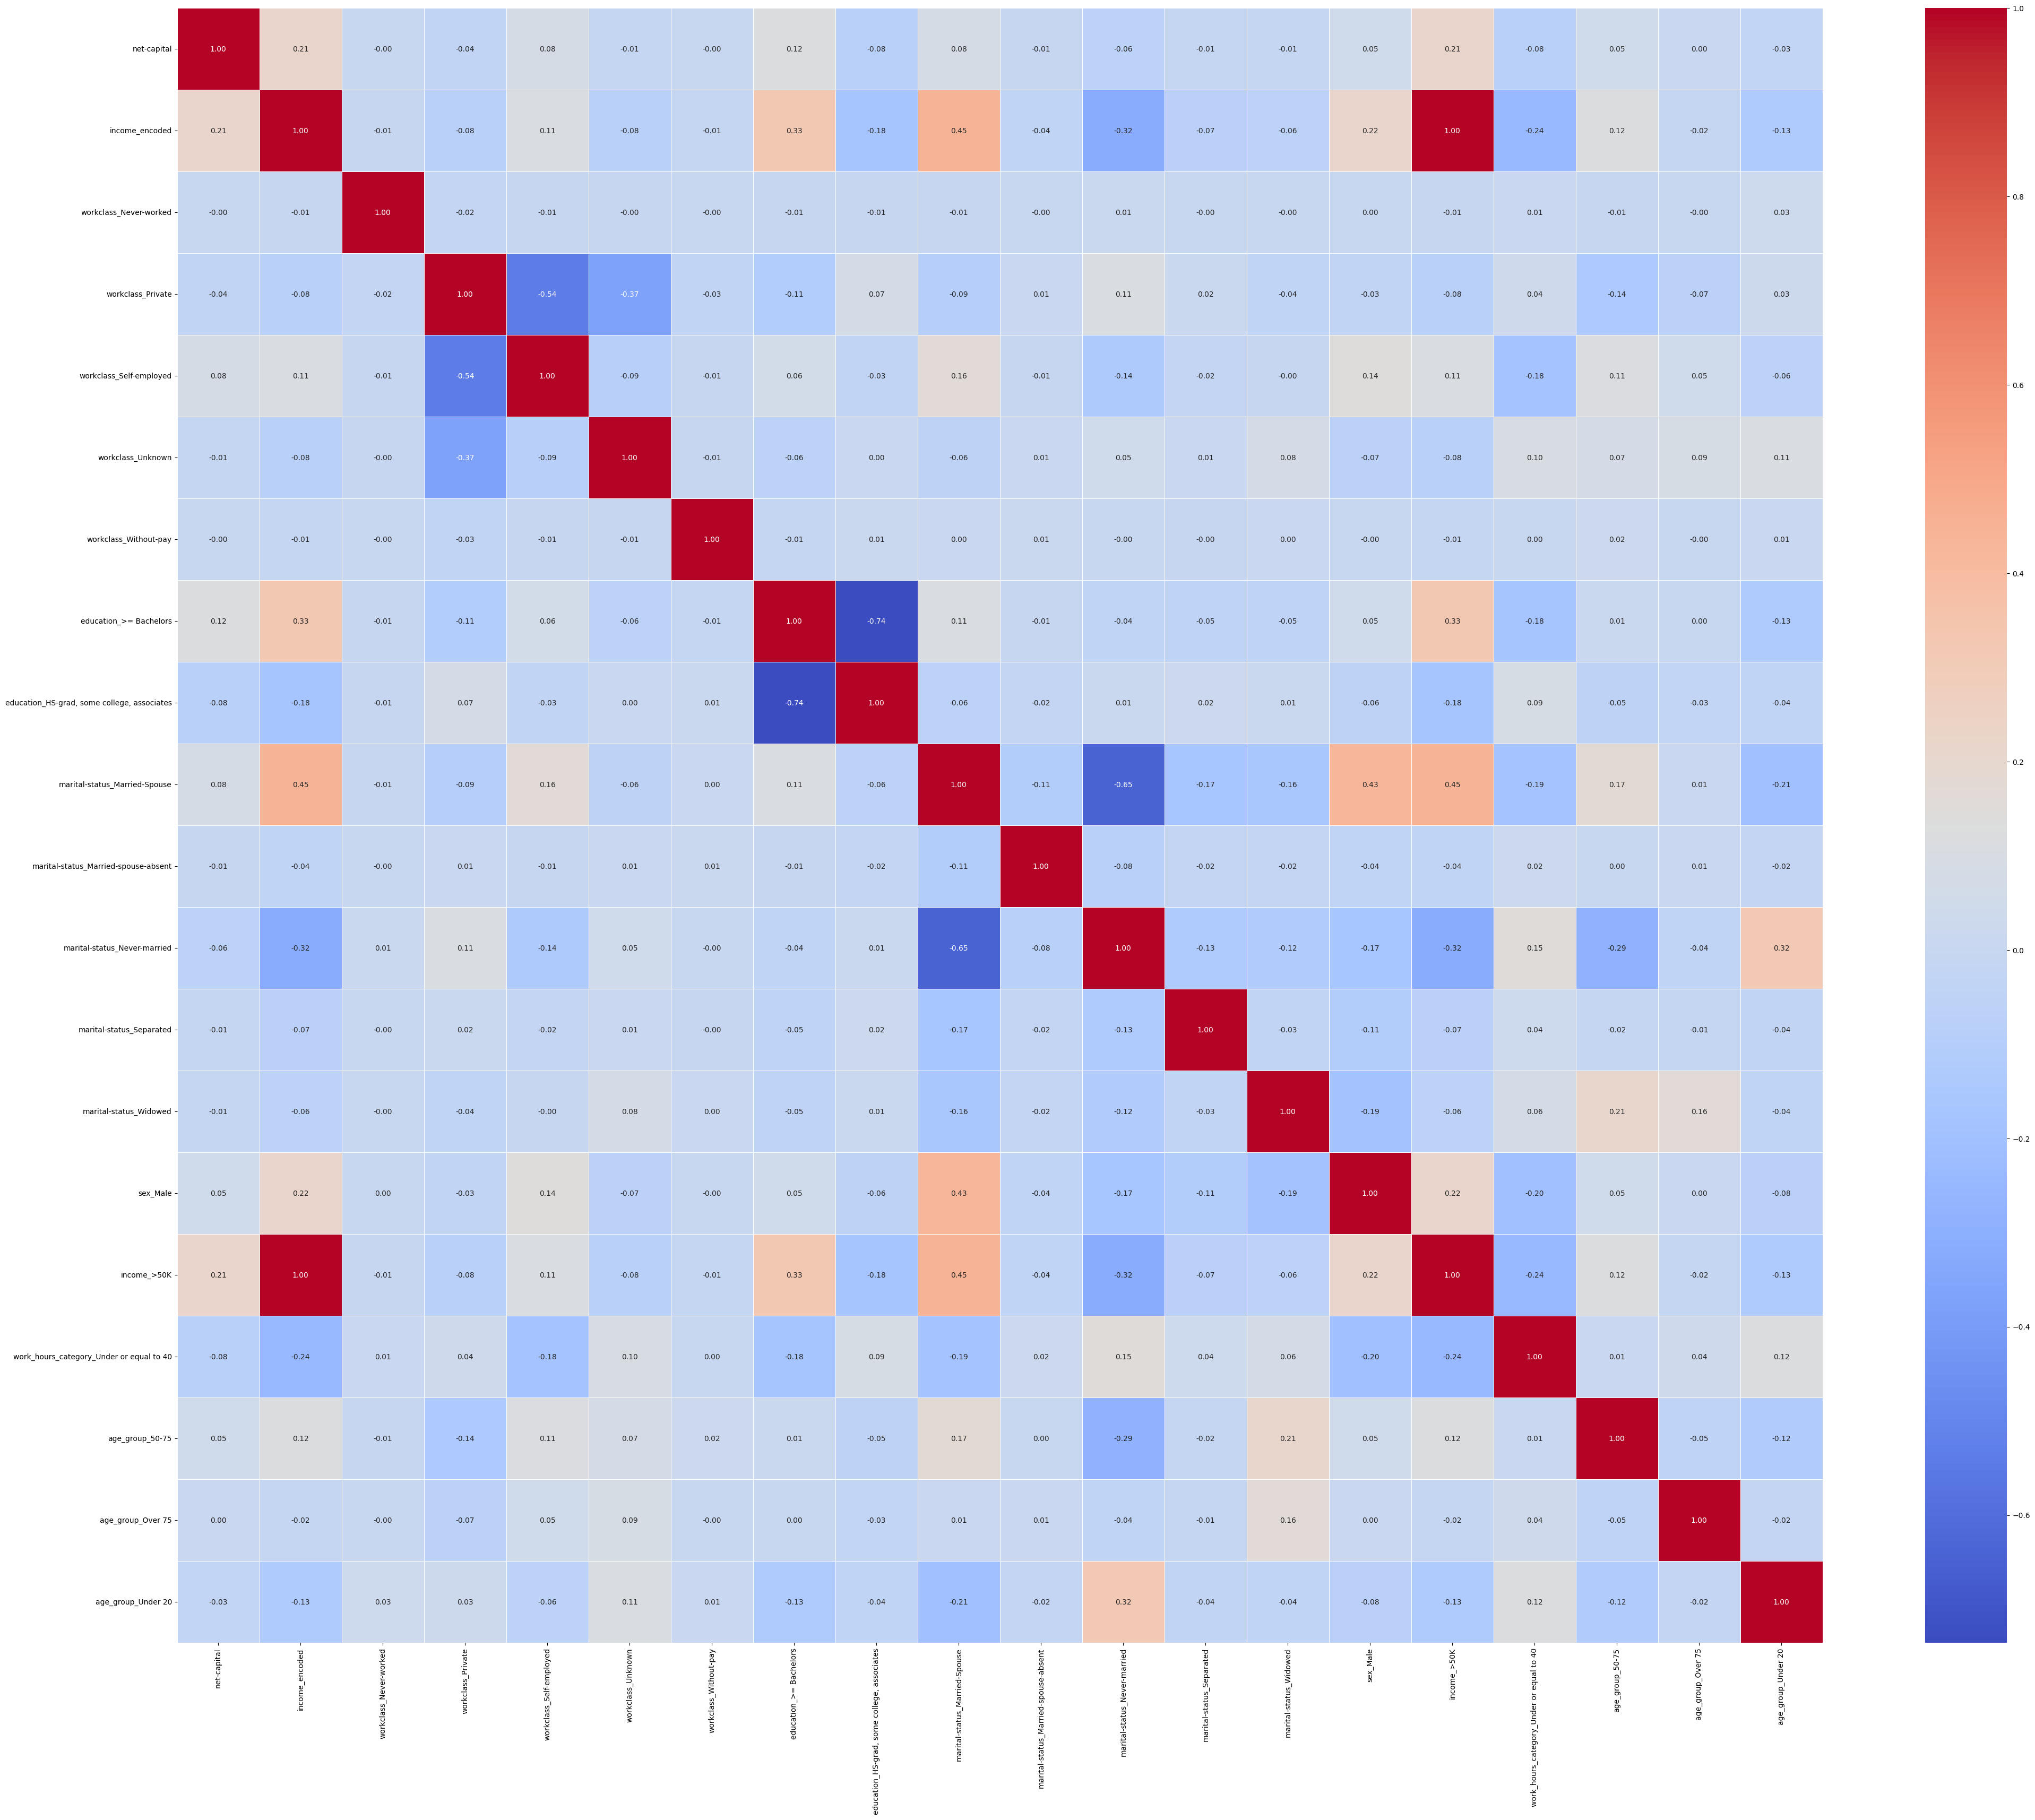

In [567]:
# Based on our correlation matrix, we can isolate additional columns and focus on a few features when running out pipeliine
# Drop seemingly unimportant columns for readability
columns_to_drop = ['continent', 'occupation']
df = df.drop(columns=columns_to_drop)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical columns

plt.figure(figsize=(50, 40))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Age Group, Education, Marital Status, Net Capital, Workclass, Work hours, and Sex
# Not all fields have to considered at once but its something we can do.

---


## EDA Findings

Based on the final set of correlation matrices I have created, I feel like I have focused on the correct fields for my initial model to determine if an individuals income is above `$50,000`. Looking at the data more closely, I tried to determine if `native-country` had an impact on income, but it did not.

Using the correlation matrix towards the end, I wanted to validate any additional correlations that may have existed that I missed. But I could not find any correlation value that would be large enough have an impact on the prediction compared to the features I have already selected, and the value its grouping was returning (such as `education_>=Bachelors` or `marital-status_Married-Spouse`). Given its an imbalanced dataset, even a marginal increase in predictability could have a large impact on the outcome.

### Data cleaning

The data I have cleaned up focuses on binning or consolidating values within features to reduce the the number of choices to consider when making a prediction with a classification model. This process will be carried over to the pipeline process when making our predictions. Below is a summary of the cleaning done.

- Consolidated `age` to `age_groups` into ranges
- Consolidated `hours-per-week` into `<=40` hours and `>40` hours
- Consolidated `education` into groups to highlight the hierarchy required for education. This should make ordinal encoding simpler
- Consolidated duplicated feature values within `workclass` to combine all government type jobs into a single government class and self employed sub classes into a single class
- Consolidated the `capital-gain` and `capital-loss` into a `net-capital` value
- Dropped certain columns to remove duplicate columns in favor of feature engineered columns to validate the correlation matrix just in-case I missed some correlation between income and some feature value.

---

# Feature Engineering

The final set of features we will focus on are as follows:

- Age Group
  - This column is derived from `age` and is segregates age ranges by income
- Sex
  - This column has the unfortunate historical context of women typically earning less then men due to the gender gap with income
- Education
  - Consolidates education type into groups to better represent education levels typically completed together (K-12, Some college, Bachelors and above).
  This also allows us to treat the `education-num` column as a duplicate
- Marital Status
  - This column a hypothesis I have that stability in a persons relationship correlate to higher income. This also allows us to treat the `relationship` column as a duplicate
- Workclass
  - Defines what class of work the person is in, not necessarily the industry. This can mean the potential for higher income in certain classes where income and job availability is stable such as government jobs.
- Work Hours Category
  - This defines the work hours into specific hours worked, indicating less then or equal to a typical work week of 40 hours, and a typical work week or greater
- Net Capital Gain
  - This is the difference between `capital-gain` and `capital-loss`.

# ML Pipeline



In [568]:
# Receive fresh dataset and define columns
df = pd.read_csv(income_dataset, header=None, skipinitialspace=True)
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
df.columns = column_names

In [569]:
# Define functions to implement in the pipeline
# These represent our engineered features.
# Function to consolidate marital status
def process_marital_status(df):
    df['marital-status'] = df['marital-status'].apply(
        lambda x: 'Married-Spouse' if x in ['Married-civ-spouse', 'Married-AF-spouse'] else x
    )
    return df

# Function to consolidate education levels
def process_education(df):
    education_mapping = {
        'Bachelors': '>= Bachelors',
        'Masters': '>= Bachelors',
        'Prof-school': '>= Bachelors',
        'Doctorate': '>= Bachelors',
        'HS-grad': 'HS-grad, some college, associates',
        'Some-college': 'HS-grad, some college, associates',
        'Assoc-acdm': 'HS-grad, some college, associates',
        'Assoc-voc': 'HS-grad, some college, associates',
        '1st-4th': '<= 12th grade',
        '5th-6th': '<= 12th grade',
        '7th-8th': '<= 12th grade',
        '9th': '<= 12th grade',
        '10th': '<= 12th grade',
        '11th': '<= 12th grade',
        '12th': '<= 12th grade',
        'Preschool': '<= 12th grade'
    }
    df['education'] = df['education'].replace(education_mapping)
    return df

# Function to consolidate workclass
def process_workclass(df):
    workclass_mapping = {
        '?': 'Unknown',
        'Self-emp-inc': 'Self-employed',
        'Self-emp-not-inc': 'Self-employed',
        'Federal-gov': 'Government',
        'State-gov': 'Government',
        'Local-gov': 'Government'
    }
    df['workclass'] = df['workclass'].replace(workclass_mapping)
    return df

# Function to categorize work hours
def process_work_hours(df):
    df['work_hours_category'] = np.where(df['hours-per-week'] > 40, 'Over 40', 'Under or equal to 40')
    return df

# Function to categorize age
def process_age(df):
    bins = [0, 19, 49, 74, float("inf")]
    labels = ["Under 20", "20-50", "50-75", "Over 75"]
    df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
    return df

# Function to create net capital
def process_net_capital(df):
    df['net-capital'] = df['capital-gain'] - df['capital-loss']
    return df

# Function to drop columns
def drop_unnecessary_columns(df):
    columns_to_drop = [
        'fnlwgt', 'education-num', 'relationship', 'occupation', 'race',
        'native-country', 'capital-gain', 'capital-loss', 'hours-per-week', 'age'
    ]
    return df.drop(columns=columns_to_drop, axis=1)


In [570]:
# Preprocess
# Define Ordinal Encoding for Education
ordinal_encoder = OrdinalEncoder(categories=[['<= 12th grade', 'HS-grad, some college, associates', '>= Bachelors']])

# Define One-Hot Encoding for categorical features
one_hot_encoder = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')

# Define StandardScaler for numerical columns
scaler = StandardScaler()

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("ordinal", ordinal_encoder, ["education"]),
    ("onehot", one_hot_encoder, ["age_group", "sex", "marital-status", "workclass", "work_hours_category"]),
    ("scaler", scaler, ["net-capital"])
], remainder='passthrough')

# Define full pipeline
full_pipeline = Pipeline([
    ("marital_status", FunctionTransformer(process_marital_status, validate=False)),
    ("education", FunctionTransformer(process_education, validate=False)),
    ("workclass", FunctionTransformer(process_workclass, validate=False)),
    ("work_hours", FunctionTransformer(process_work_hours, validate=False)),
    ("age", FunctionTransformer(process_age, validate=False)),
    ("net_capital", FunctionTransformer(process_net_capital, validate=False)),
    ("drop_columns", FunctionTransformer(drop_unnecessary_columns, validate=False)),
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=20))
])

with config_context(display="diagram"):
  display(full_pipeline)


Pipeline(steps=[('marital_status',
                 FunctionTransformer(func=<function process_marital_status at 0x7d39c6488fe0>)),
                ('education',
                 FunctionTransformer(func=<function process_education at 0x7d39c6489440>)),
                ('workclass',
                 FunctionTransformer(func=<function process_workclass at 0x7d39c6489580>)),
                ('work_hours',
                 FunctionTransformer(func=<function process_work_hours at 0x7d...
                                                  OrdinalEncoder(categories=[['<= '
                                                                              '12th '
                                                                              'grade',
                                                                              'HS-grad, '
                                                                              'some '
                                                                              'college, '
                                                                              'associates',
                                                                              '>= '
                                                                              'Bachelors']]),
                                                  ['education']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['age_group', 'sex',
                                                   'marital-status',
                                                   'workclass',
                                                   'work_hours_category']),
                                                 ('scaler', StandardScaler(),
                                                  ['net-capital'])])),
                ('classifier', RandomForestClassifier(random_state=20))])

In [571]:
# Encode target variable and define it.
target = 'income'
df[target] = df[target].map({"<=50K": 0, ">50K": 1})


In [572]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=[target]),
    df[target],
    test_size=0.25,
    random_state=20,
    stratify=df[target]
  )

# Fit pipeline
full_pipeline.fit(X_train, y_train)

# Predictions
y_pred = full_pipeline.predict(X_test)

Model Accuracy: 0.8562
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6181
           1       0.76      0.58      0.66      1960

    accuracy                           0.86      8141
   macro avg       0.82      0.76      0.79      8141
weighted avg       0.85      0.86      0.85      8141

🔹 Random Forest Classifier ROC AUC Score: 0.7631
🔹 Random Forest Classifier Precision-Recall AUC Score: 0.5457


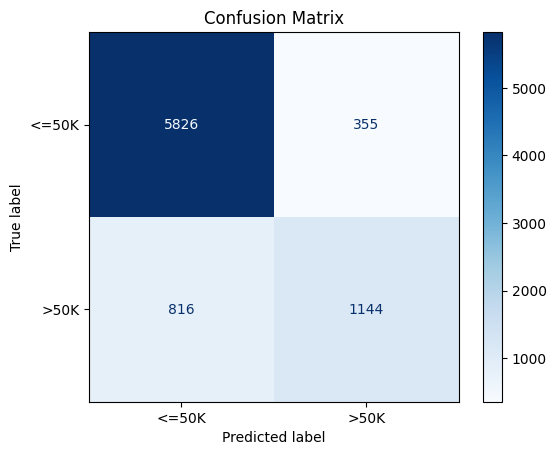

In [573]:
# Evaluate
# classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Calculate AUC score and Precision
roc_auc = roc_auc_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

print(f"🔹 Random Forest Classifier ROC AUC Score: {roc_auc:.4f}")
print(f"🔹 Random Forest Classifier Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


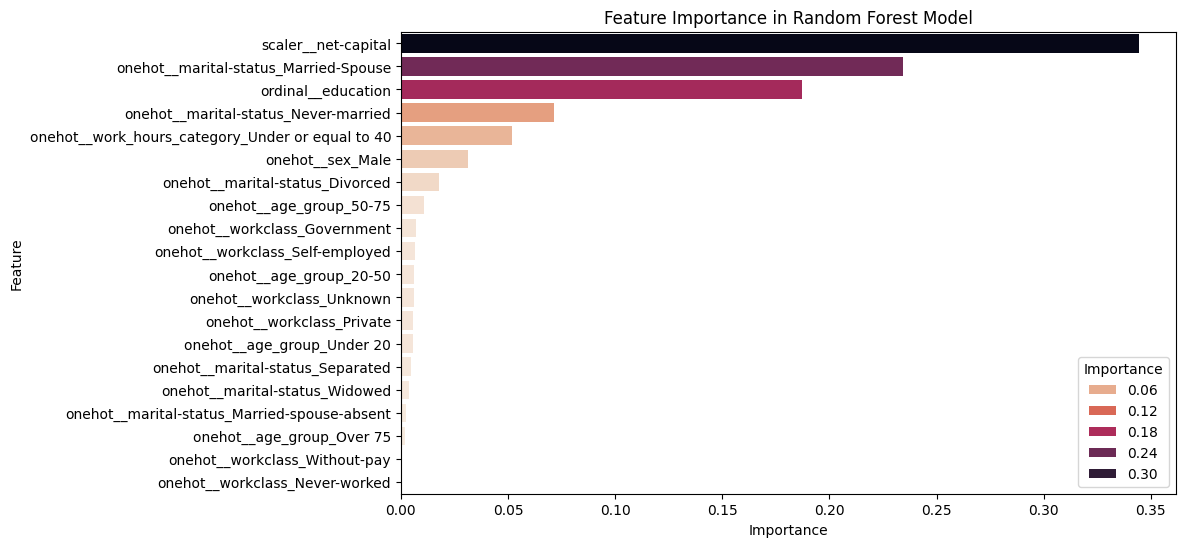

In [574]:
# Determine feature importance to attempt to validate our initial questions
# Extract feature names
feature_names = full_pipeline.named_steps["preprocessing"].get_feature_names_out()

# Get feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': full_pipeline.named_steps["classifier"].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="Importance", y="Feature", palette="rocket_r", hue="Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [575]:
# Hyperparameter tuning for Models

# Hyperparameters
param_grids = [
   # Random Forest
   {
        'classifier': [RandomForestClassifier(random_state=20)],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [10, 20, 30],
        'classifier__min_samples_split': [2, 10],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__class_weight': ['balanced', 'balanced_subsample'],
    },
   # XGBoost
    {
        'classifier': [XGBClassifier(random_state=20, eval_metric='logloss')],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [3, 6, 9],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1.0],
        'classifier__reg_lambda': [0.1, 1, 10],
        'classifier__reg_alpha': [0, 0.1, 1],
        'classifier__class_weight': ['balanced']
    },
    # Gradient Boost
    {
        'classifier': [GradientBoostingClassifier(random_state=20)],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1.0],
        'classifier__max_features': ['sqrt', 'log2', None],
    },
    # Logistic Regression
    {
        'classifier': [LogisticRegression(solver='liblinear', random_state=20)],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__class_weight': ['balanced'],
        'classifier__max_iter': [100, 500, 1000]
    },
    # Support Vector Machine
    {
        'classifier': [LinearSVC(random_state=20, dual=False)],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__class_weight': ['balanced'],
        'classifier__max_iter': [1000, 5000]
    }
]


scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
    'average_precision': make_scorer(average_precision_score)
}

# Choosing the best cross validation splits
cv_options = [3, 5, 10]
best_cv = None
best_cv_score = 0

# Automatically find the best CV using cross-validation
for cv in cv_options:
    cross_validation = StratifiedKFold(n_splits=cv, shuffle=True, random_state=20)
    scores = cross_val_score(full_pipeline, X_train, y_train, cv=cross_validation, scoring='average_precision')
    avg_score = scores.mean()

    print(f"CV={cv}, Average Precision Score: {avg_score:.4f}")

    if avg_score > best_cv_score:
        best_cv_score = avg_score
        best_cv = cv

print(f"\nBest CV value: {best_cv} with score: {best_cv_score:.4f}")


# Since we know the adult income dataset is imbalanced, we must use StratifiedKfold.
final_cross_validation = StratifiedKFold(n_splits=best_cv, shuffle=True, random_state=42)


CV=3, Average Precision Score: 0.7580
CV=5, Average Precision Score: 0.7611
CV=10, Average Precision Score: 0.7644

Best CV value: 10 with score: 0.7644


In [576]:
def check_and_load_saved_model(model_name, param_grid, base_dir="models", save_dir="saved_models"):
    # Ensure base directory exists
    full_save_path = os.path.join(base_dir, save_dir)
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
        print(f"✅ Base directory created: {base_dir}")
    else:
        print(f"✅ Base directory already exists: {base_dir}")

    # Ensure model save directory exists
    if not os.path.exists(full_save_path):
        os.makedirs(full_save_path)
        print(f"✅ Save directory created: {full_save_path}")
    else:
        print(f"✅ Save directory already exists: {full_save_path}")

    # Extract random_state from model (if applicable)
    random_state = param_grid['classifier'][0].random_state if hasattr(param_grid['classifier'][0], 'random_state') else 0

    # Define model filename
    model_filename = os.path.join(full_save_path, f"{model_name}_rs{random_state}.pkl")

    # Check if the saved model exists
    if os.path.exists(model_filename):
        print(f"\n📂 Loading saved model: {model_filename}")
        return joblib.load(model_filename), True  # Return loaded model and existence flag
    else:
        return model_filename, False  # Return filename for saving and non-existence flag


# Function to run GridSearchCV for each classifier and display results
def run_grid_search_and_display(param_grid):
    model_name = param_grid['classifier'][0].__class__.__name__

    # Check if saved model exists or needs training
    model_check, exists = check_and_load_saved_model(model_name, param_grid, base_path, save_dir)

    if exists:
        grid_search = model_check  # Load existing model
    else:
      print(f"Running GridSearchCV for {model_name}...")

      start_time = time.time()

      grid_search = GridSearchCV(
          full_pipeline,
          param_grid,
          cv=final_cross_validation,
          scoring=scoring_metrics,
          refit='average_precision',
          n_jobs=-1,
          verbose=2
      )

      grid_search.fit(X_train, y_train)

      end_time = time.time()
      elapsed_time = end_time - start_time
      print(f"Completed GridSearchCV for {model_name}")
      print(f"Time taken for {model_name}: {elapsed_time:.2f} seconds")

      # Save trained model
      joblib.dump(grid_search, model_check)
      print(f"Model saved as: {model_check}")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Print best results
    print(f"\nBest Model for {model_name}:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Average Precision Score:", grid_search.best_score_)

    return model_name, grid_search, best_model

# Run GridSearchCV sequentially for each model
grid_search_results = {}
best_models = {}

for param_grid in param_grids:
    model_name, grid_search, best_model = run_grid_search_and_display(param_grid)
    grid_search_results[model_name] = grid_search
    best_models[model_name] = best_model

# Display summary performance of all models
summary_data = []
for model_name, grid_search in grid_search_results.items():
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    summary_data.append([model_name, best_score, best_params])




✅ Base directory already exists: /content/gdrive/My Drive/Colab Notebooks
✅ Save directory created: /content/gdrive/My Drive/Colab Notebooks/model_result
Running GridSearchCV for RandomForestClassifier...
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Completed GridSearchCV for RandomForestClassifier
Time taken for RandomForestClassifier: 76.63 seconds
Model saved as: /content/gdrive/My Drive/Colab Notebooks/model_result/RandomForestClassifier_rs20.pkl

Best Model for RandomForestClassifier:
Best Hyperparameters: {'classifier': RandomForestClassifier(random_state=20), 'classifier__class_weight': 'balanced_subsample', 'classifier__max_depth': 30, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Average Precision Score: 0.5031418567941713
✅ Base directory already exists: /content/gdrive/My Drive/Colab Notebooks
✅ Save directory already exists: /content/gdrive/My Drive/Colab Notebooks/model_result
Running GridSea

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:03:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Completed GridSearchCV for XGBClassifier
Time taken for XGBClassifier: 97.14 seconds
Model saved as: /content/gdrive/My Drive/Colab Notebooks/model_result/XGBClassifier_rs20.pkl

Best Model for XGBClassifier:
Best Hyperparameters: {'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=20


📊 Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      6181
           1       0.56      0.81      0.66      1960

    accuracy                           0.80      8141
   macro avg       0.74      0.80      0.76      8141
weighted avg       0.84      0.80      0.81      8141

🔹 RandomForestClassifier ROC AUC Score: 0.8958
🔹 RandomForestClassifier Precision-Recall AUC Score: 0.7678

📊 Classification Report for XGBClassifier:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6181
           1       0.80      0.59      0.68      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.77      0.80      8141
weighted avg       0.86      0.87      0.86      8141

🔹 XGBClassifier ROC AUC Score: 0.9112
🔹 XGBClassifier Precision-Recall AUC Score: 0.7971

📊 Classification Report for GradientBoostingClassi

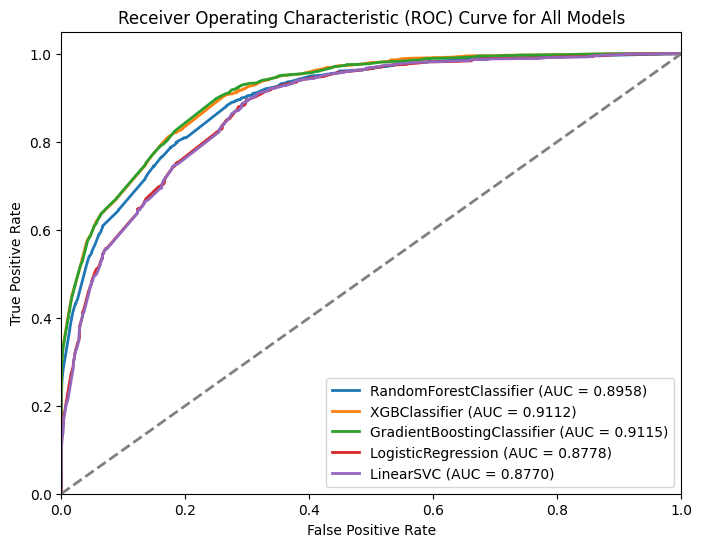


📊 Model Performance Comparison:
                     Model  ROC AUC Score  Precision-Recall AUC Score
    RandomForestClassifier       0.895785                    0.767818
             XGBClassifier       0.911162                    0.797052
GradientBoostingClassifier       0.911456                    0.796773
        LogisticRegression       0.877800                    0.709880
                 LinearSVC       0.877046                    0.706422


In [577]:
import seaborn as sns

# save the model if it ran before under a certain random state
def check_and_load_saved_model(model_name, param_grid, save_dir="saved_models"):
    os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

    # Extract random_state from model (if applicable)
    random_state = param_grid['classifier'][0].random_state if hasattr(param_grid['classifier'][0], 'random_state') else 0

    # Define model filename
    model_filename = os.path.join(save_dir, f"{model_name}_rs{random_state}.pkl")

    # Check if the saved model exists
    if os.path.exists(model_filename):
        print(f"\n📂 Loading saved model: {model_filename}")
        return joblib.load(model_filename), True  # Return loaded model and existence flag
    else:
        return model_filename, False  # Return filename for saving and non-existence flag

# Updated function to include feature importance visualization
def evaluate_all_models(grid_search_results, X_test, y_test):
    model_performance = []

    plt.figure(figsize=(8, 6))

    for model_name, grid_search in grid_search_results.items():
        if not hasattr(grid_search, "best_estimator_"):
            raise RuntimeError(f"GridSearchCV for {model_name} has not been run yet!")

        # Get the best model for this classifier
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred = best_model.predict(X_test)

        # Check if model supports probability predictions
        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test)[:, 1]
        else:
            y_prob = best_model.decision_function(X_test)

        # Ensure y_test is a 1D array
        y_test = np.ravel(y_test)

        # Print classification report for each model
        print(f"\n📊 Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

        # Calculate AUC score and Precision
        roc_auc = roc_auc_score(y_test, y_prob)
        pr_auc = average_precision_score(y_test, y_prob)

        print(f"🔹 {model_name} ROC AUC Score: {roc_auc:.4f}")
        print(f"🔹 {model_name} Precision-Recall AUC Score: {pr_auc:.4f}")

        # Store results for later comparison
        model_performance.append([model_name, roc_auc, pr_auc])

        # Compute ROC curve and plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')


    # Plot
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for All Models')
    plt.legend(loc="lower right")
    plt.show()

    results_summary = pd.DataFrame(model_performance, columns=['Model', 'ROC AUC Score', 'Precision-Recall AUC Score'])

    # Display results summary
    print("\n📊 Model Performance Comparison:")
    print(results_summary.to_string(index=False))

# Run evaluation on all models
evaluate_all_models(grid_search_results, X_test, y_test)


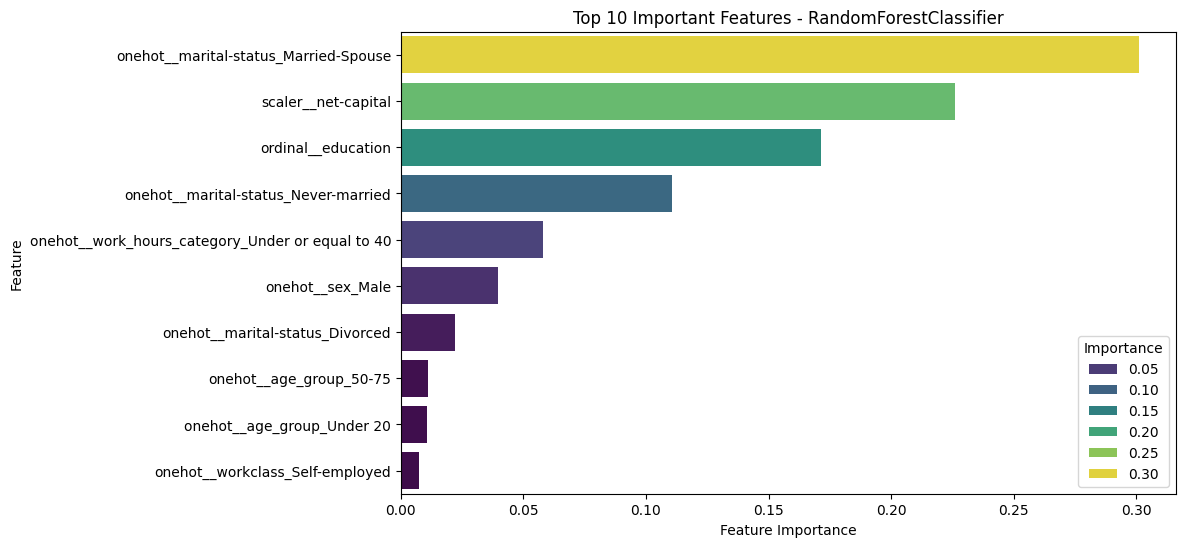

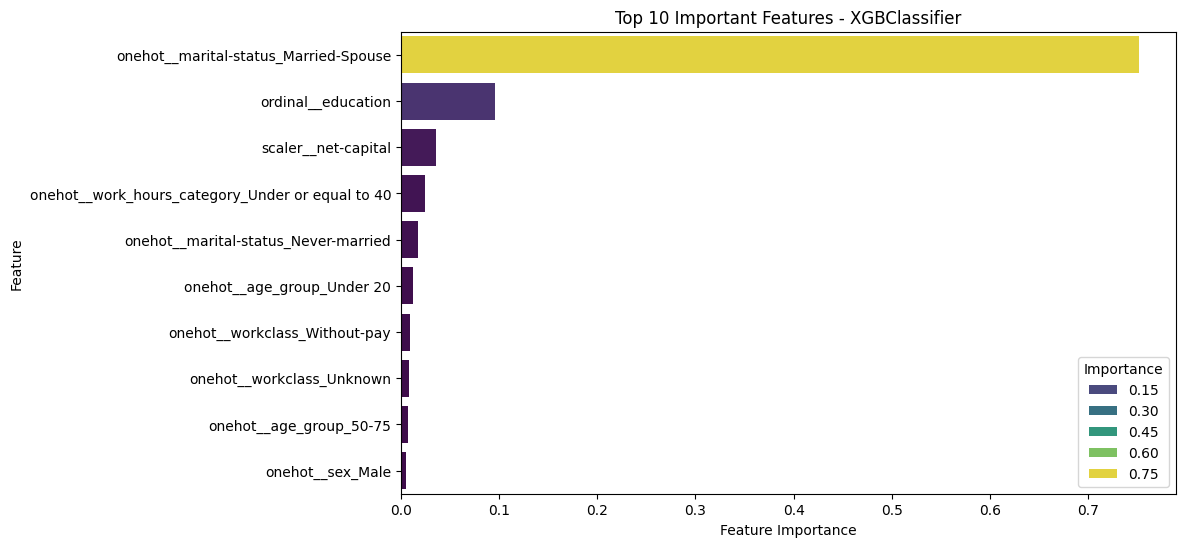

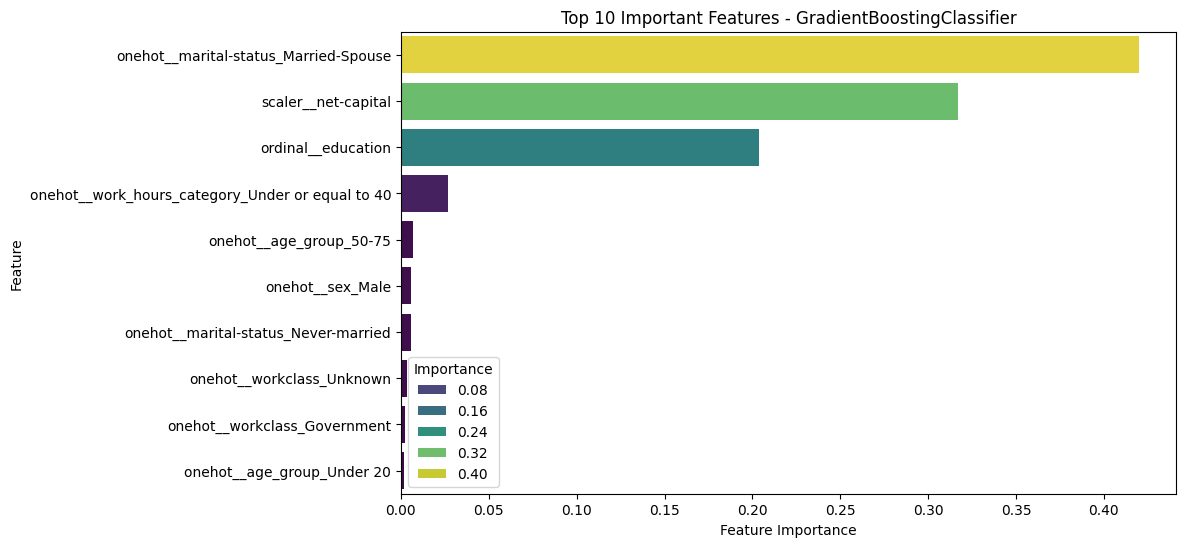

⚠️ LogisticRegression does not support feature importance extraction.
⚠️ LinearSVC does not support feature importance extraction.


In [578]:
def plot_feature_importance_all_models(grid_search_results):
    for model_name, grid_search in grid_search_results.items():
        if not hasattr(grid_search, "best_estimator_"):
            print(f"⚠️ GridSearchCV for {model_name} has not been run yet!")
            continue

        # Get the best model for this classifier
        best_model = grid_search.best_estimator_

        # Check if model supports feature importance
        if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
            feature_importances = best_model.named_steps['classifier'].feature_importances_
            feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()

            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)

            # Plot Feature Importance
            plt.figure(figsize=(10, 6))
            sns.barplot(y=importance_df['Feature'][:10], x=importance_df['Importance'][:10], hue=importance_df['Importance'][:10], palette='viridis')
            plt.xlabel('Feature Importance')
            plt.ylabel('Feature')
            plt.title(f'Top 10 Important Features - {model_name}')
            print("\n")
            plt.show()
        else:
            print(f"⚠️ {model_name} does not support feature importance extraction.")

plot_feature_importance_all_models(grid_search_results)


📊 Model Financial Impact:
                     Model   TP   TN   FP  FN  Total Revenue
    RandomForestClassifier 1587 4932 1249 373         641100
                 LinearSVC 1700 4459 1722 260         624550
        LogisticRegression 1660 4539 1642 300         608550
GradientBoostingClassifier 1190 5854  327 770         514300
             XGBClassifier 1149 5895  286 811         487650


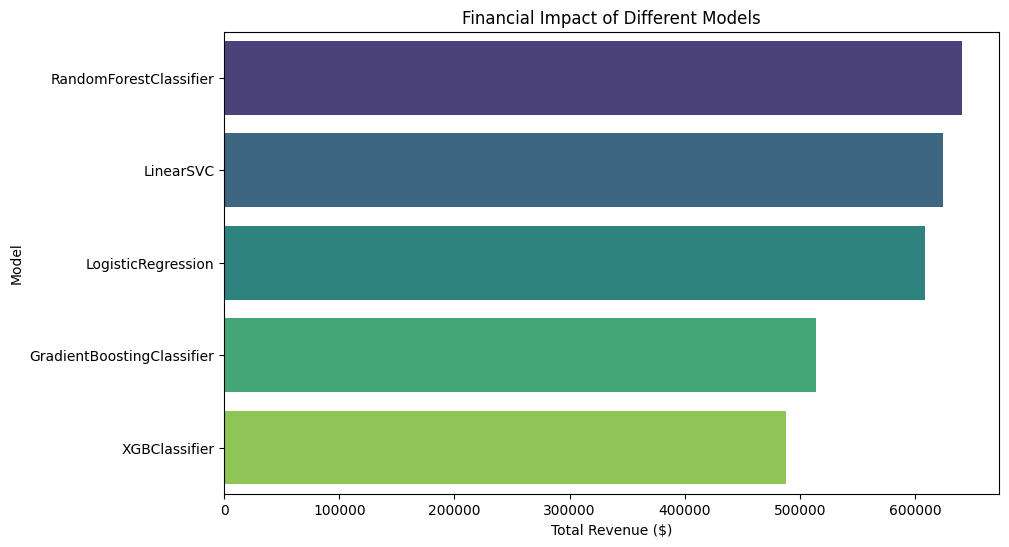

In [579]:
def evaluate_financial_impact(grid_search_results, X_test, y_test, financial_values):
    model_performance = []

    for model_name, grid_search in grid_search_results.items():
        if not hasattr(grid_search, "best_estimator_"):
            print(f"⚠️ GridSearchCV for {model_name} has not been run yet!")
            continue

        # Get the best model
        best_model = grid_search.best_estimator_

        # Predict
        y_pred = best_model.predict(X_test)

        # Confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calculate financial impact
        total_revenue = (
            (tp * financial_values["TP"]) +
            (tn * financial_values["TN"]) +
            (fp * financial_values["FP"]) +
            (fn * financial_values["FN"])
        )

        model_performance.append([
            model_name, tp, tn, fp, fn, total_revenue
        ])

    results_summary = pd.DataFrame(model_performance,
                                   columns=['Model', 'TP', 'TN', 'FP', 'FN', 'Total Revenue'])

    # Sort by highest financial impact
    results_summary = results_summary.sort_values(by="Total Revenue", ascending=False)

    # Display results
    print("\n📊 Model Financial Impact:")
    print(results_summary.to_string(index=False))

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Total Revenue", y="Model", data=results_summary, hue="Model", palette="viridis")
    plt.xlabel("Total Revenue ($)")
    plt.ylabel("Model")
    plt.title("Financial Impact of Different Models")
    plt.show()

    return results_summary

# Define financial impact values based on the provided example
financial_values = {
    "TP": 500,   # True Positives = $500 revenue per correct high-value prediction
    "TN": 50,    # True Negatives = $50 revenue per correct low-value prediction
    "FP": -200,  # False Positives = -$200 penalty per incorrect high-value prediction
    "FN": -400   # False Negatives = -$400 penalty per incorrect low-value prediction
}

financial_results = evaluate_financial_impact(grid_search_results, X_test, y_test, financial_values)


📊 Model Financial Impact:
                     Model   TP   TN   FP  FN  Total Revenue
    RandomForestClassifier 1587 4932 1249 373         641100
                 LinearSVC 1700 4459 1722 260         624550
        LogisticRegression 1660 4539 1642 300         608550
GradientBoostingClassifier 1190 5854  327 770         514300
             XGBClassifier 1149 5895  286 811         487650


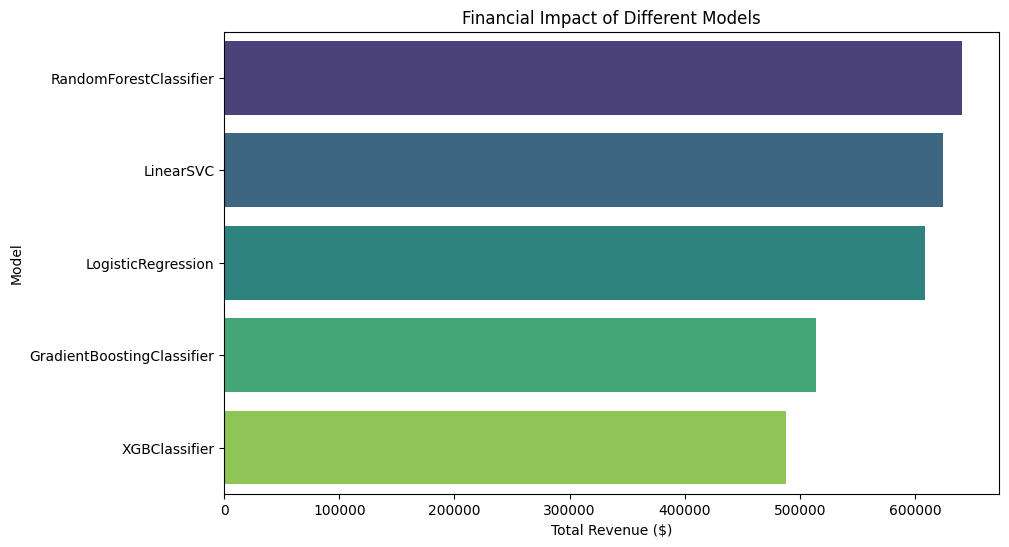


🏆 Best Model: RandomForestClassifier (Total Revenue: $641,100.00)

📊 Classification Metrics for RandomForestClassifier:
🔹 Accuracy: 0.8008
🔹 Precision: 0.5596
🔹 Recall: 0.8097
🔹 F1 Score: 0.6618


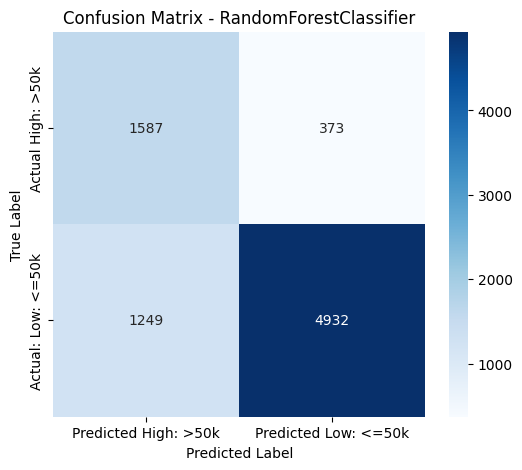

In [580]:
def evaluate_best_model(grid_search_results, X_test, y_test, financial_values):
    # Get financial impact for all models
    financial_results = evaluate_financial_impact(grid_search_results, X_test, y_test, financial_values)

    # Identify the best model based on highest financial impact
    best_model_name = financial_results.iloc[0]['Model']
    best_score = financial_results.iloc[0]['Total Revenue']

    # Retrieve the best model
    best_model = grid_search_results[best_model_name].best_estimator_

    # Generate final predictions for the best model
    y_pred = best_model.predict(X_test)

    # Compute classification metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🏆 Best Model: {best_model_name} (Total Revenue: ${best_score:,.2f})")

    print(f"\n📊 Classification Metrics for {best_model_name}:")
    print(f"🔹 Accuracy: {acc:.4f}")
    print(f"🔹 Precision: {precision:.4f}")
    print(f"🔹 Recall: {recall:.4f}")
    print(f"🔹 F1 Score: {f1:.4f}")

    # Compute confusion matrix for best model
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap([[tp, fn], [fp, tn]], annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted High: >50k", "Predicted Low: <=50k"],
                yticklabels=["Actual High: >50k", "Actual: Low: <=50k"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.show()

    return {
        "best_model_name": best_model_name,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "total_revenue": best_score,
        "confusion_matrix": (tp, fn, fp, tn)
    }

best_model_metrics = evaluate_best_model(grid_search_results, X_test, y_test, financial_values)